# Business problem overview

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn

# Definitions of churn


There are various ways to define churn, such as:

Revenue-based churn: Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.

 

The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.

 

Usage-based churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

 

A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator

### Importing required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option('display.max_columns', 500)

In [4]:
df = pd.read_csv("telecom_churn_data.csv")
data_dict = pd.read_excel("Data+Dictionary-+Telecom+Churn+Case+Study.xlsx")

In [5]:
data_dict

Acronyms                                           Descriptions
0   MOBILE_NUMBER                              Customer phone number
1       CIRCLE_ID  Telecom circle area to which the customer belo...
2             LOC           Local calls - within same telecom circle
3             STD             STD calls - outside the calling circle
4              IC                                     Incoming calls
5              OG                                     Outgoing calls
6             T2T  Operator T to T, i.e. within same operator (mo...
7         T2M                    Operator T to other operator mobile
8         T2O                Operator T to other operator fixed line
9         T2F                         Operator T to fixed lines of T
10        T2C                     Operator T to it’s own call center
11       ARPU                               Average revenue per user
12        MOU                         Minutes of usage - voice calls
13        AON      Age on network - number of days the customer i...
14       ONNET     All kind of calls within the same operator net...
15     OFFNET       All kind of calls outside the operator T network
16           ROAM  Indicates that customer is in roaming zone dur...
17         SPL                                         Special calls
18        ISD                                              ISD calls
19       RECH                                               Recharge
20        NUM                                                 Number
21        AMT                               Amount in local currency
22        MAX                                                Maximum
23       DATA                                        Mobile internet
24         3G                                             3G network
25         AV                                                Average
26        VOL                   Mobile internet usage volume (in MB)
27         2G                                             2G network
28        PCK                 Prepaid service schemes called - PACKS
29      NIGHT         Scheme to use during specific night hours only
30    MONTHLY      Service schemes with validity equivalent to a ...
31      SACHET     Service schemes with validity smaller than a m...
32        *.6                              KPI for the month of June
33        *.7                              KPI for the month of July
34        *.8                            KPI for the month of August
35        *.9                         KPI for the month of September
36        FB_USER  Service scheme to avail services of Facebook a...
37        VBC      Volume based cost - when no specific scheme is...

In [6]:
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [7]:
df.shape

(99999, 226)

In [8]:
df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

#### As we can see that the columns with datetime values represented as object, they can be converted into datetime format

In [9]:
# selecting all the columns with datetime format
date_col= df.select_dtypes(include=['object'])
print("\nThese are the columns available with datetime format represented as object\n",date_col.columns)

# Converting the selected columns to datetime format
for i in date_col.columns:
    df[i] = pd.to_datetime(df[i])

# Current dimension of the dataset
df.shape


These are the columns available with datetime format represented as object
 Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype='object')


(99999, 226)

In [10]:
# lets check the columns  unique values and drop such columns with its value as 1
unique_col=[]
for i in df.columns:
    if df[i].nunique() == 1:
        unique_col.append(i)
    else:
        pass


In [11]:
df[unique_col]

circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0            109             0.0             0.0             0.0   
1            109             0.0             0.0             0.0   
2            109             0.0             0.0             0.0   
3            109             0.0             0.0             0.0   
4            109             0.0             0.0             0.0   
...          ...             ...             ...             ...   
99994        109             0.0             0.0             0.0   
99995        109             0.0             0.0             0.0   
99996        109             0.0             0.0             0.0   
99997        109             0.0             0.0             0.0   
99998        109             0.0             0.0             0.0   

      last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0               2014-06-30           2014-07-31           2014-08-31   
1               2014-06-30           2014-07-31           2014-08-31   
2               2014-06-30           2014-07-31           2014-08-31   
3               2014-06-30           2014-07-31           2014-08-31   
4               2014-06-30           2014-07-31           2014-08-31   
...                    ...                  ...                  ...   
99994           2014-06-30           2014-07-31           2014-08-31   
99995           2014-06-30           2014-07-31           2014-08-31   
99996           2014-06-30           2014-07-31           2014-08-31   
99997           2014-06-30           2014-07-31           2014-08-31   
99998           2014-06-30           2014-07-31           2014-08-31   

      last_date_of_month_9  std_og_t2c_mou_6  std_og_t2c_mou_7  \
0               2014-09-30               NaN               NaN   
1               2014-09-30               0.0               0.0   
2               2014-09-30               0.0               0.0   
3               2014-09-30               0.0               0.0   
4               2014-09-30               0.0               0.0   
...                    ...               ...               ...   
99994           2014-09-30               0.0               0.0   
99995           2014-09-30               0.0               0.0   
99996           2014-09-30               0.0               NaN   
99997           2014-09-30               0.0               0.0   
99998           2014-09-30               0.0               NaN   

       std_og_t2c_mou_8  std_og_t2c_mou_9  std_ic_t2o_mou_6  std_ic_t2o_mou_7  \
0                   0.0               NaN               NaN               NaN   
1                   0.0               0.0               0.0               0.0   
2                   0.0               0.0               0.0               0.0   
3                   0.0               0.0               0.0               0.0   
4                   0.0               0.0               0.0               0.0   
...                 ...               ...               ...               ...   
99994               0.0               0.0               0.0               0.0   
99995               0.0               0.0               0.0               0.0   
99996               NaN               NaN               0.0               NaN   
99997               0.0               0.0               0.0               0.0   
99998               NaN               NaN               0.0               NaN   

       std_ic_t2o_mou_8  std_ic_t2o_mou_9  
0                   0.0               NaN  
1                   0.0               0.0  
2                   0.0               0.0  
3                   0.0               0.0  
4                   0.0               0.0  
...                 ...               ...  
99994               0.0               0.0  
99995               0.0               0.0  
99996               NaN               NaN  
99997               0.0               0.0  
99998               NaN               NaN  

[99999 rows x 16 columns]

In [12]:
df.drop(unique_col, axis=1, inplace = True)
print("\n The following Columns are dropped from the dataset as their unique value is 1. (i.e.)It has no variance in the model\n",
      unique_col)


 The following Columns are dropped from the dataset as their unique value is 1. (i.e.)It has no variance in the model
 ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']


### 2. Check for the percentage of missing values in datase

In [13]:
# % of missing values in Train data
(100*(df.isnull().sum()/df.shape[0])).sort_values(ascending = False)

night_pck_user_6      74.846748
arpu_2g_6             74.846748
count_rech_3g_6       74.846748
av_rech_amt_data_6    74.846748
count_rech_2g_6       74.846748
                        ...    
last_day_rch_amt_6     0.000000
last_day_rch_amt_7     0.000000
last_day_rch_amt_8     0.000000
last_day_rch_amt_9     0.000000
mobile_number          0.000000
Length: 210, dtype: float64

In [14]:
# Handling missing values with respect to `data recharge` attributes
df[['date_of_last_rech_data_6','total_rech_data_6','max_rech_data_6']].head(10)

date_of_last_rech_data_6  total_rech_data_6  max_rech_data_6
0               2014-06-21                1.0            252.0
1                      NaT                NaN              NaN
2                      NaT                NaN              NaN
3                      NaT                NaN              NaN
4               2014-06-04                1.0             56.0
5                      NaT                NaN              NaN
6                      NaT                NaN              NaN
7                      NaT                NaN              NaN
8                      NaT                NaN              NaN
9                      NaT                NaN              NaN

- Let us consider the column date_of_last_rech_data indicating the date of the last recharge made in any given month for mobile internet. Here it can deduced if the total_rech_data and the max_rech_data also has missing values, the missing values in all the columns mentioned can be considered as meaningful missing.

- Hence imputing 0 as their values.

- Meaningfull missing in this case represents the the customer has not done any recharge for mobile interenet.

#### Handling the missing values for the attributes total_rech_data_*, max_rech_data_* and for month 6,7,8 and 9

In [15]:
for i in range(len(df)):
  # Handling 'total_rech_data', 'max_rech_data' and for month 6
    if pd.isnull((df['total_rech_data_6'][i]) and (df['max_rech_data_6'][i])):
        if pd.isnull(df['date_of_last_rech_data_6'][i]):
            df['total_rech_data_6'][i]=0
            df['max_rech_data_6'][i]=0

  # Handling 'total_rech_data', 'max_rech_data' and for month 7
    if pd.isnull((df['total_rech_data_7'][i]) and (df['max_rech_data_7'][i])):
        if pd.isnull(df['date_of_last_rech_data_7'][i]):
            df['total_rech_data_7'][i]=0
            df['max_rech_data_7'][i]=0

  # Handling 'total_rech_data', 'max_rech_data' and for month 8
    if pd.isnull((df['total_rech_data_8'][i]) and (df['max_rech_data_8'][i])):
        if pd.isnull(df['date_of_last_rech_data_8'][i]):
            df['total_rech_data_8'][i]=0
            df['max_rech_data_8'][i]=0

  # Handling 'total_rech_data', 'max_rech_data' and for month 9
    if pd.isnull((df['total_rech_data_9'][i]) and (df['max_rech_data_9'][i])):
        if pd.isnull(df['date_of_last_rech_data_9'][i]):
            df['total_rech_data_9'][i]=0
            df['max_rech_data_9'][i]=0
            
print("The columns \n'total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9'\n'max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9' are imputed with 0 based on the condition explained above")

The columns 
'total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9'
'max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9' are imputed with 0 based on the condition explained above


In [16]:
# Checking the related columns values
df[['count_rech_2g_6','count_rech_3g_6','total_rech_data_6']].head(10)

count_rech_2g_6  count_rech_3g_6  total_rech_data_6
0              0.0              1.0                1.0
1              NaN              NaN                0.0
2              NaN              NaN                0.0
3              NaN              NaN                0.0
4              1.0              0.0                1.0
5              NaN              NaN                0.0
6              NaN              NaN                0.0
7              NaN              NaN                0.0
8              NaN              NaN                0.0
9              NaN              NaN                0.0

From the above tablular the column values of total_rech_data for each month from 6 to 9 respectively is the sum of the columns values of count_rech_2g for each month from 6 to 9 respectively and count_rech_3g for each month from 6 to 9 respectively, which derives to a multicollinearity issue. In order to reduce the multicollinearity, we can drop the columns count_rech_2g for each month from 6 to 9 respectively and count_rech_3g for each month from 6 to 9 respectively.

In [17]:
# Dropping the columns 'count_rech_2g_*' & 'count_rech_3g_*' for the months 6,7,8 and 9 
df.drop(['count_rech_2g_6','count_rech_3g_6',
                   'count_rech_2g_7','count_rech_3g_7',
                   'count_rech_2g_8','count_rech_3g_8',
                   'count_rech_2g_9','count_rech_3g_9'],axis=1, inplace=True)

#### Handling the missing values for the attributes arpu_3g_*,arpu_2g_* for month 6,7,8 and 9


In [18]:
# Checking the related columns values
df[['arpu_3g_6','arpu_2g_6','av_rech_amt_data_6']].head(10)

arpu_3g_6  arpu_2g_6  av_rech_amt_data_6
0     212.17     212.17               252.0
1        NaN        NaN                 NaN
2        NaN        NaN                 NaN
3        NaN        NaN                 NaN
4       0.00       0.00                56.0
5        NaN        NaN                 NaN
6        NaN        NaN                 NaN
7        NaN        NaN                 NaN
8        NaN        NaN                 NaN
9        NaN        NaN                 NaN

In [19]:
# Checking the correlation between the above mentioned columns in tabular for months 6,7,8 and 9
print("Correlation table for month 6\n\n", df[['arpu_3g_6','arpu_2g_6','av_rech_amt_data_6']].corr())
print("\nCorrelation table for month 7\n\n", df[['arpu_3g_7','arpu_2g_7','av_rech_amt_data_7']].corr())
print("\nCorrelation table for month 8\n\n", df[['arpu_3g_8','arpu_2g_8','av_rech_amt_data_8']].corr())
print("\nCorrelation table for month 9\n\n", df[['arpu_3g_9','arpu_2g_9','av_rech_amt_data_9']].corr())

Correlation table for month 6

                     arpu_3g_6  arpu_2g_6  av_rech_amt_data_6
arpu_3g_6            1.000000   0.932232            0.809695
arpu_2g_6            0.932232   1.000000            0.834065
av_rech_amt_data_6   0.809695   0.834065            1.000000

Correlation table for month 7

                     arpu_3g_7  arpu_2g_7  av_rech_amt_data_7
arpu_3g_7            1.000000   0.930366            0.796131
arpu_2g_7            0.930366   1.000000            0.815933
av_rech_amt_data_7   0.796131   0.815933            1.000000

Correlation table for month 8

                     arpu_3g_8  arpu_2g_8  av_rech_amt_data_8
arpu_3g_8            1.000000   0.924925            0.787165
arpu_2g_8            0.924925   1.000000            0.805482
av_rech_amt_data_8   0.787165   0.805482            1.000000

Correlation table for month 9

                     arpu_3g_9  arpu_2g_9  av_rech_amt_data_9
arpu_3g_9            1.000000   0.852253            0.722932
arpu_2g_9      

From the above correlation table between attributes arpu_2g_* and arpu_3g_* for each month from 6 to 9 respectively is highly correlated to the attribute av_rech_amt_data_* for each month from 6 to 9 respectively.

In [20]:
# Dropping the columns 'arpu_3g_*'&'arpu_2g_*' in month 6,7,8 and 9 datafrom the dataset
df.drop(['arpu_3g_6','arpu_2g_6',
                  'arpu_3g_7','arpu_2g_7',
                  'arpu_3g_8','arpu_2g_8',
                  'arpu_3g_9','arpu_2g_9'],axis=1, inplace=True)

#### Handling the other attributes with higher missing value percentage

The column fb_user_* and night_pck_user_* for each month from 6 to 9 respectively has a missing values above 50% and does not seem to add any information to understand the data

In [21]:
df.drop(['fb_user_6','fb_user_7','fb_user_8','fb_user_9',
                  'night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9'],
                  axis=1, inplace=True)

#### Handling the missing values for the attributes av_rech_amt_data_* for month 6,7,8 and 9

In [22]:
# Checking the related columns values
df[['av_rech_amt_data_7','max_rech_data_7','total_rech_data_7']].head(10)

av_rech_amt_data_7  max_rech_data_7  total_rech_data_7
0               252.0            252.0                1.0
1               154.0            154.0                1.0
2                 NaN              0.0                0.0
3                 NaN              0.0                0.0
4                 NaN              0.0                0.0
5                 NaN              0.0                0.0
6                 NaN              0.0                0.0
7                 NaN              0.0                0.0
8               177.0            154.0                2.0
9               154.0            154.0                1.0

From the above tabular it is deduced that the missing values for the column av_rech_amt_data_* for each month from 6 to 9 can be replaced as 0 if the total_rech_data_* for each month from 6 to 9 respectively

In [23]:
for i in range(len(df)):
  # Handling `av_rech_amt_data`  for month 6
    if (pd.isnull(df['av_rech_amt_data_6'][i]) and (df['total_rech_data_6'][i]==0)):
        df['av_rech_amt_data_6'][i] = 0

  # Handling `av_rech_amt_data`  for month 7
    if (pd.isnull(df['av_rech_amt_data_7'][i]) and (df['total_rech_data_7'][i]==0)):
        df['av_rech_amt_data_7'][i] = 0

  # Handling `av_rech_amt_data`  for month 8
    if (pd.isnull(df['av_rech_amt_data_8'][i]) and (df['total_rech_data_8'][i]==0)):
        df['av_rech_amt_data_8'][i] = 0

  # Handling `av_rech_amt_data`  for month 9
    if (pd.isnull(df['av_rech_amt_data_9'][i]) and (df['total_rech_data_9'][i]==0)):
        df['av_rech_amt_data_9'][i] = 0


In [24]:
# Checkng the overall missing values in the dataset
((df.isnull().sum()/df.shape[0])*100).round(2).sort_values(ascending=False)

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_9    74.08
date_of_last_rech_data_8    73.66
std_ic_t2t_mou_9             7.75
                            ...  
total_rech_data_8            0.00
total_rech_data_9            0.00
max_rech_data_6              0.00
max_rech_data_7              0.00
mobile_number                0.00
Length: 186, dtype: float64

From the above results, we can conclude, the date_of_last_rech_data_* corresponding to months 6,7,8 and 9 are of no value after the conditional imputation of columns total_rech_data_*, max_rech_data_*

In [25]:
df.drop(["date_of_last_rech_data_6","date_of_last_rech_data_7",
                   "date_of_last_rech_data_8","date_of_last_rech_data_9"], axis=1, inplace=True)

As we can no more utilise the datetime column, we can drop the date_of_last_rech_data_* column

In [26]:
df.drop(["date_of_last_rech_6","date_of_last_rech_7",
                   "date_of_last_rech_8","date_of_last_rech_9"], axis=1, inplace=True)

In [27]:
# The curent dimensions of the dataset
df.shape

(99999, 178)

### 3. Filtering the High Value Customer

In [28]:
# Filtering the data and Deriving new meaningful columns
 # We are filtering the data in accordance to total revenue generated per customer.

 # first we need the total amount recharge amount done for data alone, we have average rechage amount done. 

 # Calculating the total recharge amount done for data alone in months 6,7,8 and 9
df['total_rech_amt_data_6']=df['av_rech_amt_data_6'] * df['total_rech_data_6']
df['total_rech_amt_data_7']=df['av_rech_amt_data_7'] * df['total_rech_data_7']

# Calculating the overall recharge amount for the months 6,7,8 and 9
df['overall_rech_amt_6'] = df['total_rech_amt_data_6'] + df['total_rech_amt_6']
df['overall_rech_amt_7'] = df['total_rech_amt_data_7'] + df['total_rech_amt_7']

# Calculating the average recharge done by customer in months June and July(i.e. 6th and 7th month)
df['avg_rech_amt_6_7'] = (df['overall_rech_amt_6'] + df['overall_rech_amt_7'])/2

# Finding the value of 70th percentage in the overall revenues defining the high value customer creteria for the company
cut_off = df['avg_rech_amt_6_7'].quantile(0.70)
print("\nThe 70th quantile value to determine the High Value Customer is: ",cut_off,"\n")

# Filtering the data to the top 30% considered as High Value Customer
hvc = df[df['avg_rech_amt_6_7'] >= cut_off]



The 70th quantile value to determine the High Value Customer is:  478.0 



In [29]:
# The curent dimension of the dataset
hvc.shape

(30001, 183)

In [30]:
# Let us check the missing values percentages again for the HVC group
    # Checkng the overall missing values in the dataset
((hvc.isnull().sum()/hvc.shape[0])*100).round(2).sort_values(ascending=False)

og_others_9           6.34
ic_others_9           6.34
std_ic_mou_9          6.34
spl_og_mou_9          6.34
loc_og_t2t_mou_9      6.34
                      ... 
max_rech_data_7       0.00
max_rech_data_8       0.00
max_rech_data_9       0.00
av_rech_amt_data_6    0.00
mobile_number         0.00
Length: 183, dtype: float64

*** The remaining attributes with missing value can be imputed using the advanced imputation technique like KNNImputer.***

In [31]:
# Numerical columns available
num_col = hvc.select_dtypes(include = ['int64','float64']).columns.tolist()

In [32]:
# Importing the libraries for Scaling and Imputation
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

# Calling the Scaling function
scalar = MinMaxScaler()

# Scaling and transforming the data for the columns that are numerical
hvc[num_col]=scalar.fit_transform(hvc[num_col])

# Calling the KNN Imputer function
knn=KNNImputer(n_neighbors=3)

# Imputing the NaN values using KNN Imputer
df_knn = pd.DataFrame(knn.fit_transform(hvc[num_col]))
df_knn.columns=hvc[num_col].columns

In [33]:
# check for any null values after imputation
df_knn.isnull().sum().sum()

0

The KNN Imputer has replaced all the null values in the numerical column

In [34]:
# Converting the scaled data back to the original data
hvc[num_col]=scalar.inverse_transform(df_knn)

# Checking the top 10 data
hvc.head(10)

mobile_number    arpu_6    arpu_7    arpu_8    arpu_9  onnet_mou_6  \
0    7.000843e+09   197.385   214.816   213.803    21.100        53.27   
7    7.000702e+09  1069.180  1349.850  3171.480   500.000        57.84   
8    7.001525e+09   378.721   492.223   137.362   166.787       413.69   
21   7.002124e+09   514.453   597.753   637.760   578.596       102.41   
23   7.000887e+09    74.350   193.897   366.966   811.480        48.96   
33   7.000150e+09   977.020  2362.833   409.230   799.356         0.00   
38   7.000815e+09   363.987   486.558   393.909   391.709       248.99   
41   7.000721e+09   482.832   425.764   229.769   143.596        86.39   
48   7.000294e+09  1873.271   575.927   179.218  1189.744      2061.69   
53   7.002189e+09   978.077  1141.296   706.020  1076.247       135.14   

    onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0     24.613333         0.00    33.590000         84.23     23.993333   
7     54.680000        52.29    65.276667        453.43    567.160000   
8    351.030000        35.08    33.460000         94.66     80.630000   
21   132.110000        85.14   161.630000        757.93    896.680000   
23    50.660000        33.58    15.740000         85.41     89.360000   
33     0.000000         0.00     0.000000          0.00      0.000000   
38   619.960000       666.38   494.790000         88.86     50.580000   
41   118.880000        80.44    40.060000        232.36    280.780000   
48   881.430000       156.91  1589.230000       1087.76    258.290000   
53   119.590000       102.69    99.830000        479.31    543.180000   

    offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0           0.00     27.833333           0.00           0.00           0.00   
7         325.91    172.050000          16.23          33.49          31.64   
8         136.48    108.710000           0.00           0.00           0.00   
21        983.39    869.890000           0.00           0.00           0.00   
23        205.89    111.880000           0.00           0.00           0.00   
33          0.00      0.000000           0.00           0.00           0.00   
38         97.81    213.240000           0.00           0.00           0.00   
41        136.69     49.060000           0.00           0.00           0.00   
48         68.18    728.410000           0.00           0.00           0.00   
53        261.34    403.230000           0.00           0.00           0.00   

    roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0        0.000000           0.00           0.00           0.00       0.000000   
7        4.776667          23.74          12.59          38.06       7.876667   
8        0.000000           0.00           0.00           0.00       0.000000   
21       0.000000           0.00           0.00           0.00       0.000000   
23       0.000000           0.00           0.00           0.00       0.000000   
33       0.000000           0.00           0.00           0.00       0.000000   
38       0.000000           0.00           0.00           0.00       0.000000   
41       0.000000           0.00           0.00           0.00       0.000000   
48       0.000000           0.00           0.00           0.00       0.000000   
53       0.000000           0.00           0.00           0.00       0.000000   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0              53.27         24.613333              0.00         33.206667   
7              51.39         31.380000             40.28         43.380000   
8             297.13        217.590000             12.49         26.130000   
21              4.48          6.160000             23.34         29.980000   
23             48.96         50.660000             33.58         15.740000   
33              0.00          0.000000              0.00          0.000000   
38             29.88         17.330000              9.48         16.390000   

In [35]:
# Checking the overall missing values in the dataset
((hvc.isnull().sum()/hvc.shape[0])*100).round(2).sort_values(ascending=False)

avg_rech_amt_6_7    0.0
og_others_8         0.0
og_others_6         0.0
spl_og_mou_9        0.0
spl_og_mou_8        0.0
                   ... 
ic_others_8         0.0
ic_others_7         0.0
ic_others_6         0.0
isd_ic_mou_9        0.0
mobile_number       0.0
Length: 183, dtype: float64

In [36]:
# Reconfirming for missing values if any
hvc.isnull().sum().sum()

0

### Churn variable

As explained above in the introduction, we need to find the derive churn variable using total_ic_mou_9,total_og_mou_9,vol_2g_mb_9 and vol_3g_mb_9 attributes

In [37]:
# Selecting the columns to define churn variable (i.e. TARGET Variable)
churn_col=['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']


In [38]:
hvc[churn_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_ic_mou_9  30001 non-null  float64
 1   total_og_mou_9  30001 non-null  float64
 2   vol_2g_mb_9     30001 non-null  float64
 3   vol_3g_mb_9     30001 non-null  float64
dtypes: float64(4)
memory usage: 1.1 MB


In [39]:
# Initializing the churn variable.
hvc['churn']=0

# Imputing the churn values based on the condition
hvc['churn'] = np.where(hvc[churn_col].sum(axis=1) == 0, 1, 0)

In [40]:
hvc.head()

mobile_number    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0    7.000843e+09   197.385   214.816   213.803   21.100        53.27   
7    7.000702e+09  1069.180  1349.850  3171.480  500.000        57.84   
8    7.001525e+09   378.721   492.223   137.362  166.787       413.69   
21   7.002124e+09   514.453   597.753   637.760  578.596       102.41   
23   7.000887e+09    74.350   193.897   366.966  811.480        48.96   

    onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0     24.613333         0.00    33.590000         84.23     23.993333   
7     54.680000        52.29    65.276667        453.43    567.160000   
8    351.030000        35.08    33.460000         94.66     80.630000   
21   132.110000        85.14   161.630000        757.93    896.680000   
23    50.660000        33.58    15.740000         85.41     89.360000   

    offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0           0.00     27.833333           0.00           0.00           0.00   
7         325.91    172.050000          16.23          33.49          31.64   
8         136.48    108.710000           0.00           0.00           0.00   
21        983.39    869.890000           0.00           0.00           0.00   
23        205.89    111.880000           0.00           0.00           0.00   

    roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0        0.000000           0.00           0.00           0.00       0.000000   
7        4.776667          23.74          12.59          38.06       7.876667   
8        0.000000           0.00           0.00           0.00       0.000000   
21       0.000000           0.00           0.00           0.00       0.000000   
23       0.000000           0.00           0.00           0.00       0.000000   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0              53.27         24.613333              0.00         33.206667   
7              51.39         31.380000             40.28         43.380000   
8             297.13        217.590000             12.49         26.130000   
21              4.48          6.160000             23.34         29.980000   
23             48.96         50.660000             33.58         15.740000   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0              79.27         18.196667              0.00         24.193333   
7             308.63        447.380000            162.28        100.190000   
8              80.96         70.580000             50.54         34.580000   
21             91.81         87.930000            104.81        107.540000   
23             82.94         83.010000            148.56         83.730000   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0           0.403333          4.813333              0.00              2.69   
7          62.130000         55.140000             53.23              4.03   
8           0.000000          0.000000              0.00              0.00   
21          0.750000          0.000000              1.58              0.00   
23          0.000000          0.000000              0.00              2.45   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0           0.353333               0.0              0.00          0.243333   
7           0.000000               0.0              0.00          0.000000   
8           0.000000               0.0              7.15          0.000000   
21          0.000000               0.0              0.00          0.000000   
23          0.000000               0.0             17.71          4.080000   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0     132.953333     47.636667          0.00     60.096667              0.00   
7     422.160000    533.910000        255.79    147.603333              4.30   
8     378.090000    288.180000         63.04    

0    91.863605
1     8.136395
Name: churn, dtype: float64


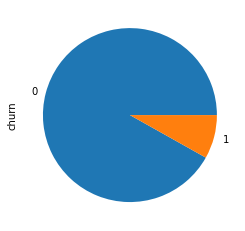

In [41]:
# lets find out churn/non churn percentage
print((hvc['churn'].value_counts()/len(hvc))*100)
((hvc['churn'].value_counts()/len(hvc))*100).plot(kind="pie")
plt.show()

Since this variable churn is the target variable, all the columns relating to this variable(i.e. all columns with suffix _9) can be dropped forn the dataset

In [42]:
# Selecting all the churn phase columns in order to drop then

churn_phase_cols = [col for col in hvc.columns if '_9' in col]
print("The columns from churn phase are:\n",churn_phase_cols)

The columns from churn phase are:
 ['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


In [43]:
# Dropping the selected churn phase columns
hvc.drop(churn_phase_cols, axis=1, inplace=True)

# The curent dimension of the dataset after dropping the churn related columns
hvc.shape

(30001, 141)

#### As we derived few columns earlier, we can drop those related columns during creation.

In [44]:
# Calculating the total recharge amount done for data alone in months 6,7
#df['total_rech_amt_data_6']=df['av_rech_amt_data_6'] * df['total_rech_data_6']
#df['total_rech_amt_data_7']=df['av_rech_amt_data_7'] * df['total_rech_data_7']

# Calculating the overall recharge amount for the months 6,7
#df['overall_rech_amt_6'] = df['total_rech_amt_data_6'] + df['total_rech_amt_6']
#df['overall_rech_amt_7'] = df['total_rech_amt_data_7'] + df['total_rech_amt_7']

In [45]:
hvc.drop(['total_rech_amt_data_6','av_rech_amt_data_6',
                   'total_rech_data_6','total_rech_amt_6',
                  'total_rech_amt_data_7','av_rech_amt_data_7',
                   'total_rech_data_7','total_rech_amt_7'], axis=1, inplace=True)

In [46]:
# creating a list of column names for each month
mon_6_cols = [col for col in hvc.columns if '_6' in col]
mon_7_cols = [col for col in hvc.columns if '_7' in col]
mon_8_cols = [col for col in hvc.columns if '_8' in col]

AON	Age on network - number of days the customer is using the operator T network

In [47]:
# creating a new variable 'tenure'
hvc['tenure'] = (hvc['aon']/30).round(0)

# Since we derived a new column from 'aon', we can drop it
hvc.drop('aon',axis=1, inplace=True)

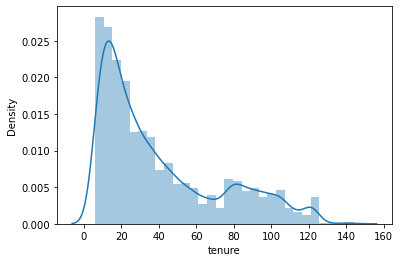

In [49]:
# Checking the distribution of the tenure variable

sns.distplot(hvc['tenure'],bins=30)
plt.show()

In [50]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
hvc['tenure_range'] = pd.cut(hvc['tenure'], tn_range, labels=tn_label)
hvc['tenure_range'].head()

0         2-5 Yrs
7         2-5 Yrs
8     6-12 Months
21        1-2 Yrs
23        1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

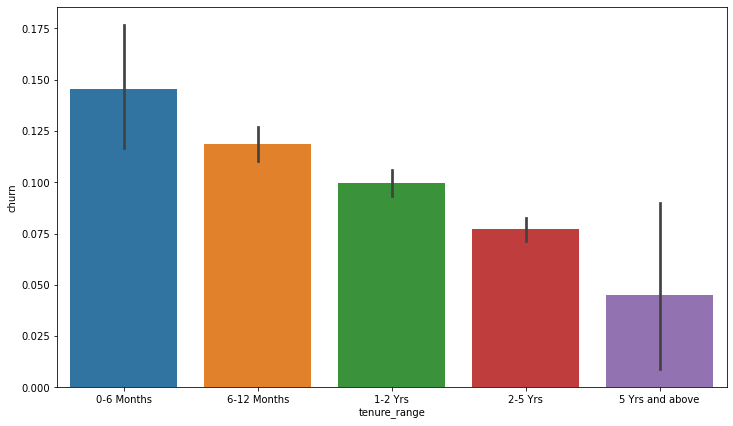

In [51]:
# Plotting a bar plot for tenure range
plt.figure(figsize=[12,7])
sns.barplot(x='tenure_range',y='churn', data=hvc)
plt.show()

It can be seen that the maximum churn rate happens within 0-6 month, but it gradually decreases as the customer retains in the network.

The average revenue per user is good phase of customer is given by arpu_6 and arpu_7. since we have two seperate averages, lets take an average to these two and drop the other columns.

In [52]:
hvc["avg_arpu_6_7"]= (hvc['arpu_6']+hvc['arpu_7'])/2
hvc['avg_arpu_6_7'].head()

0      206.1005
7     1209.5150
8      435.4720
21     556.1030
23     134.1235
Name: avg_arpu_6_7, dtype: float64

In [54]:
# Lets drop the original columns as they are derived to a new column for better understanding of the data

hvc.drop(['arpu_6','arpu_7'], axis=1, inplace=True)


# The curent dimension of the dataset after dropping few unwanted columns
hvc.shape

(30001, 133)

### EDA

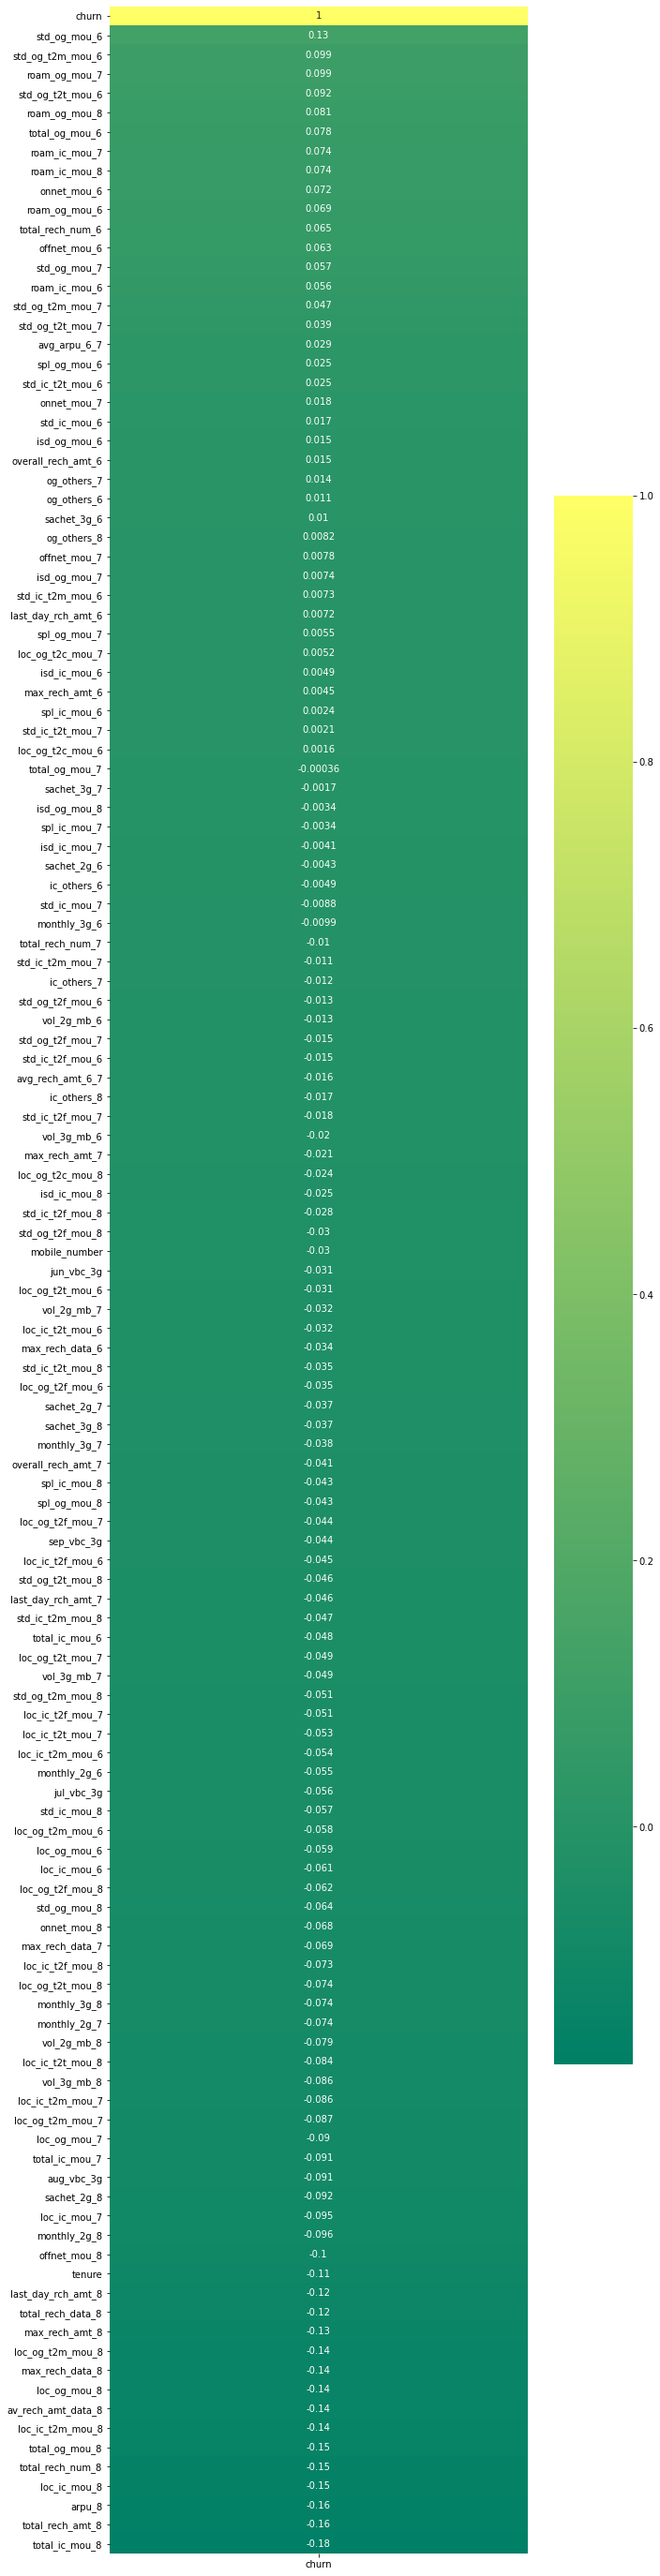

In [56]:
#Checking Correlation between target variable(SalePrice) with the other variable in the dataset
plt.figure(figsize=(10,50))
heatmap_churn = sns.heatmap(hvc.corr()[['churn']].sort_values(ascending=False, by='churn'),annot=True, 
                                cmap='summer')

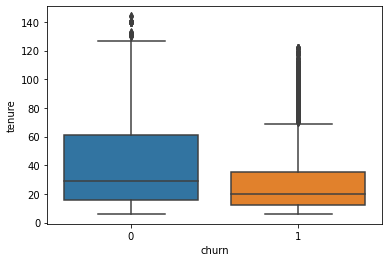

In [57]:
sns.boxplot(x = hvc.churn, y = hvc.tenure)

plt.show()

Clearly, tenured customers do no churn and they keep availing telecom services

In [58]:
num_cols = hvc.select_dtypes("number").columns
print("The numeric columns are:\n", num_cols)

The numeric columns are:
 Index(['mobile_number', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6',
       'roam_ic_mou_7',
       ...
       'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g',
       'overall_rech_amt_6', 'overall_rech_amt_7', 'avg_rech_amt_6_7', 'churn',
       'tenure', 'avg_arpu_6_7'],
      dtype='object', length=132)


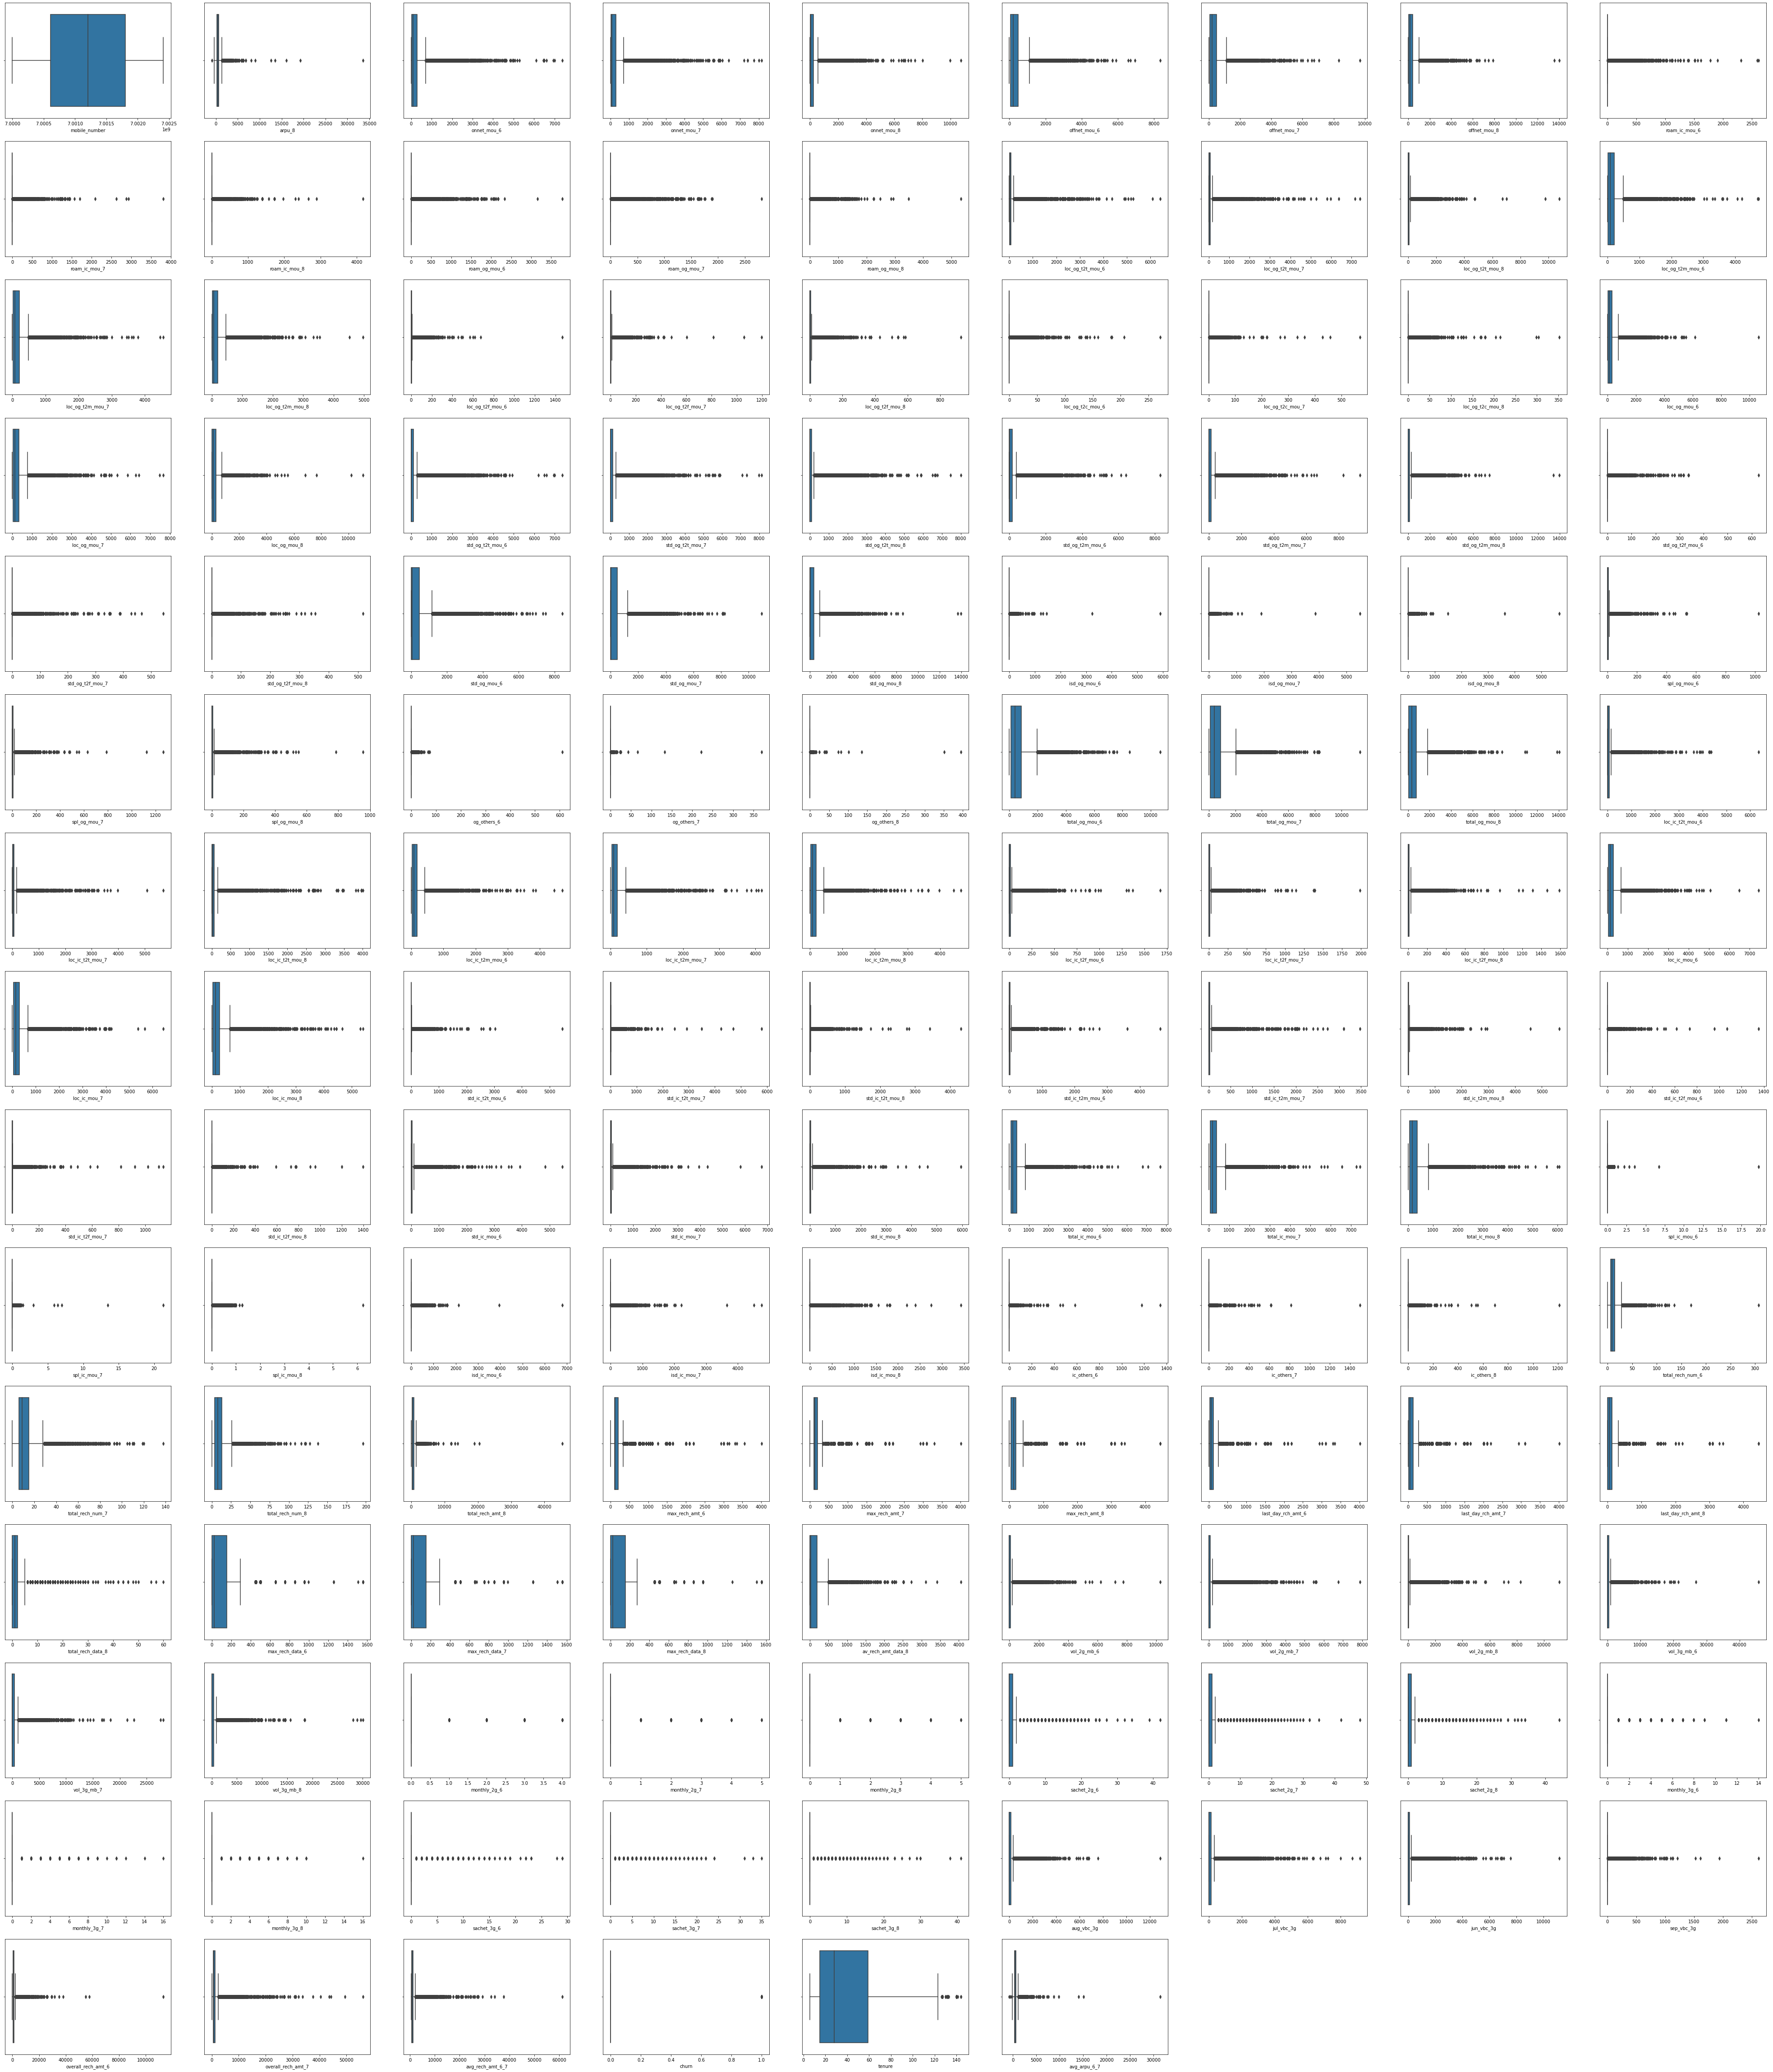

In [66]:
plt.figure(figsize = (70,95))
for i in enumerate(hvc.describe().columns):
    plt.subplot(17,9,i[0]+1)
    sns.boxplot(hvc[i[1]])
    plt.xlabel(i[1])

In [70]:
# Creating categories for month 8 column totalrecharge and their count
hvc['total_rech_data_group_8']=pd.cut(hvc['total_rech_data_8'],[-1,0,10,25,100],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])
hvc['total_rech_num_group_8']=pd.cut(hvc['total_rech_num_8'],[-1,0,10,25,1000],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])

In [78]:
hvc.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 135 columns):
 #   Column                   Dtype   
---  ------                   -----   
 0   mobile_number            float64 
 1   arpu_8                   float64 
 2   onnet_mou_6              float64 
 3   onnet_mou_7              float64 
 4   onnet_mou_8              float64 
 5   offnet_mou_6             float64 
 6   offnet_mou_7             float64 
 7   offnet_mou_8             float64 
 8   roam_ic_mou_6            float64 
 9   roam_ic_mou_7            float64 
 10  roam_ic_mou_8            float64 
 11  roam_og_mou_6            float64 
 12  roam_og_mou_7            float64 
 13  roam_og_mou_8            float64 
 14  loc_og_t2t_mou_6         float64 
 15  loc_og_t2t_mou_7         float64 
 16  loc_og_t2t_mou_8         float64 
 17  loc_og_t2m_mou_6         float64 
 18  loc_og_t2m_mou_7         float64 
 19  loc_og_t2m_mou_8         float64 
 20  loc_og_t2f_mou_6         fl

In [79]:
hvc['tenure_range'] = hvc['tenure_range'].astype('object')
hvc['total_rech_data_group_8'] = hvc['total_rech_data_group_8'].astype('object')
hvc['total_rech_num_group_8'] = hvc['total_rech_num_group_8'].astype('object')

In [80]:
hvc.select_dtypes("object").columns


Index(['tenure_range', 'total_rech_data_group_8', 'total_rech_num_group_8'], dtype='object')

In [82]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(hvc[['total_rech_data_group_8','total_rech_num_group_8','tenure_range']], drop_first=True)
dummy.head()

total_rech_data_group_8_<=10_Recharges  \
0                                        1   
7                                        0   
8                                        1   
21                                       0   
23                                       1   

    total_rech_data_group_8_>25_Recharges  \
0                                       0   
7                                       0   
8                                       0   
21                                      0   
23                                      0   

    total_rech_data_group_8_No_Recharge  \
0                                     0   
7                                     1   
8                                     0   
21                                    1   
23                                    0   

    total_rech_num_group_8_<=10_Recharges  \
0                                       1   
7                                       1   
8                                       0   
21                                      0   
23                                      1   

    total_rech_num_group_8_>25_Recharges  total_rech_num_group_8_No_Recharge  \
0                                      0                                   0   
7                                      0                                   0   
8                                      0                                   0   
21                                     1                                   0   
23                                     0                                   0   

    tenure_range_1-2 Yrs  tenure_range_2-5 Yrs  tenure_range_5 Yrs and above  \
0                      0                     1                             0   
7                      0                     1                             0   
8                      0                     0                             0   
21                     1                     0                             0   
23                     1                     0                             0   

    tenure_range_6-12 Months  
0                          0  
7                          0  
8                          1  
21                         0  
23                         0

In [83]:
# Adding the results to the master dataframe
hvc = pd.concat([hvc, dummy], axis=1)
hvc.head()

mobile_number    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0    7.000843e+09   213.803        53.27    24.613333         0.00   
7    7.000702e+09  3171.480        57.84    54.680000        52.29   
8    7.001525e+09   137.362       413.69   351.030000        35.08   
21   7.002124e+09   637.760       102.41   132.110000        85.14   
23   7.000887e+09   366.966        48.96    50.660000        33.58   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0          84.23     23.993333          0.00           0.00           0.00   
7         453.43    567.160000        325.91          16.23          33.49   
8          94.66     80.630000        136.48           0.00           0.00   
21        757.93    896.680000        983.39           0.00           0.00   
23         85.41     89.360000        205.89           0.00           0.00   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.00           0.00           0.00           0.00   
7           31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00   
21           0.00           0.00           0.00           0.00   
23           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0              53.27         24.613333              0.00             79.27   
7              51.39         31.380000             40.28            308.63   
8             297.13        217.590000             12.49             80.96   
21              4.48          6.160000             23.34             91.81   
23             48.96         50.660000             33.58             82.94   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0          18.196667              0.00          0.403333          4.813333   
7         447.380000            162.28         62.130000         55.140000   
8          70.580000             50.54          0.000000          0.000000   
21         87.930000            104.81          0.750000          0.000000   
23         83.010000            148.56          0.000000          0.000000   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00          0.353333               0.0              0.00   
7              53.23          0.000000               0.0              0.00   
8               0.00          0.000000               0.0              7.15   
21              1.58          0.000000               0.0              0.00   
23              0.00          0.000000               0.0             17.71   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0     132.953333     47.636667          0.00              0.00   
7     422.160000    533.910000        255.79              4.30   
8     378.090000    288.180000         63.04            116.56   
21     97.040000     94.090000        129.74             97.93   
23    131.910000    133.680000        182.14              0.00   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0               0.00              0.00              0.41          0.976667   
7              23.29             12.01             49.89         31.760000   
8             133.43             22.58             13.69         10.040000   
21            125.94             61.79            665.36        808.740000   
23              0.00              0.00              2.36          6.350000   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.00              0.00              0.00              0.00   
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
21            876.99              0.00              0.00              0.00   
23             39.61              0.00              0.

### Building the model

In [132]:
# Creating a copy of the filtered dataframe

df=hvc[:].copy()

# Dropping unwanted columns
df.drop(['tenure_range','mobile_number','total_rech_data_group_8','total_rech_num_group_8','sep_vbc_3g','tenure'], axis=1, inplace=True)

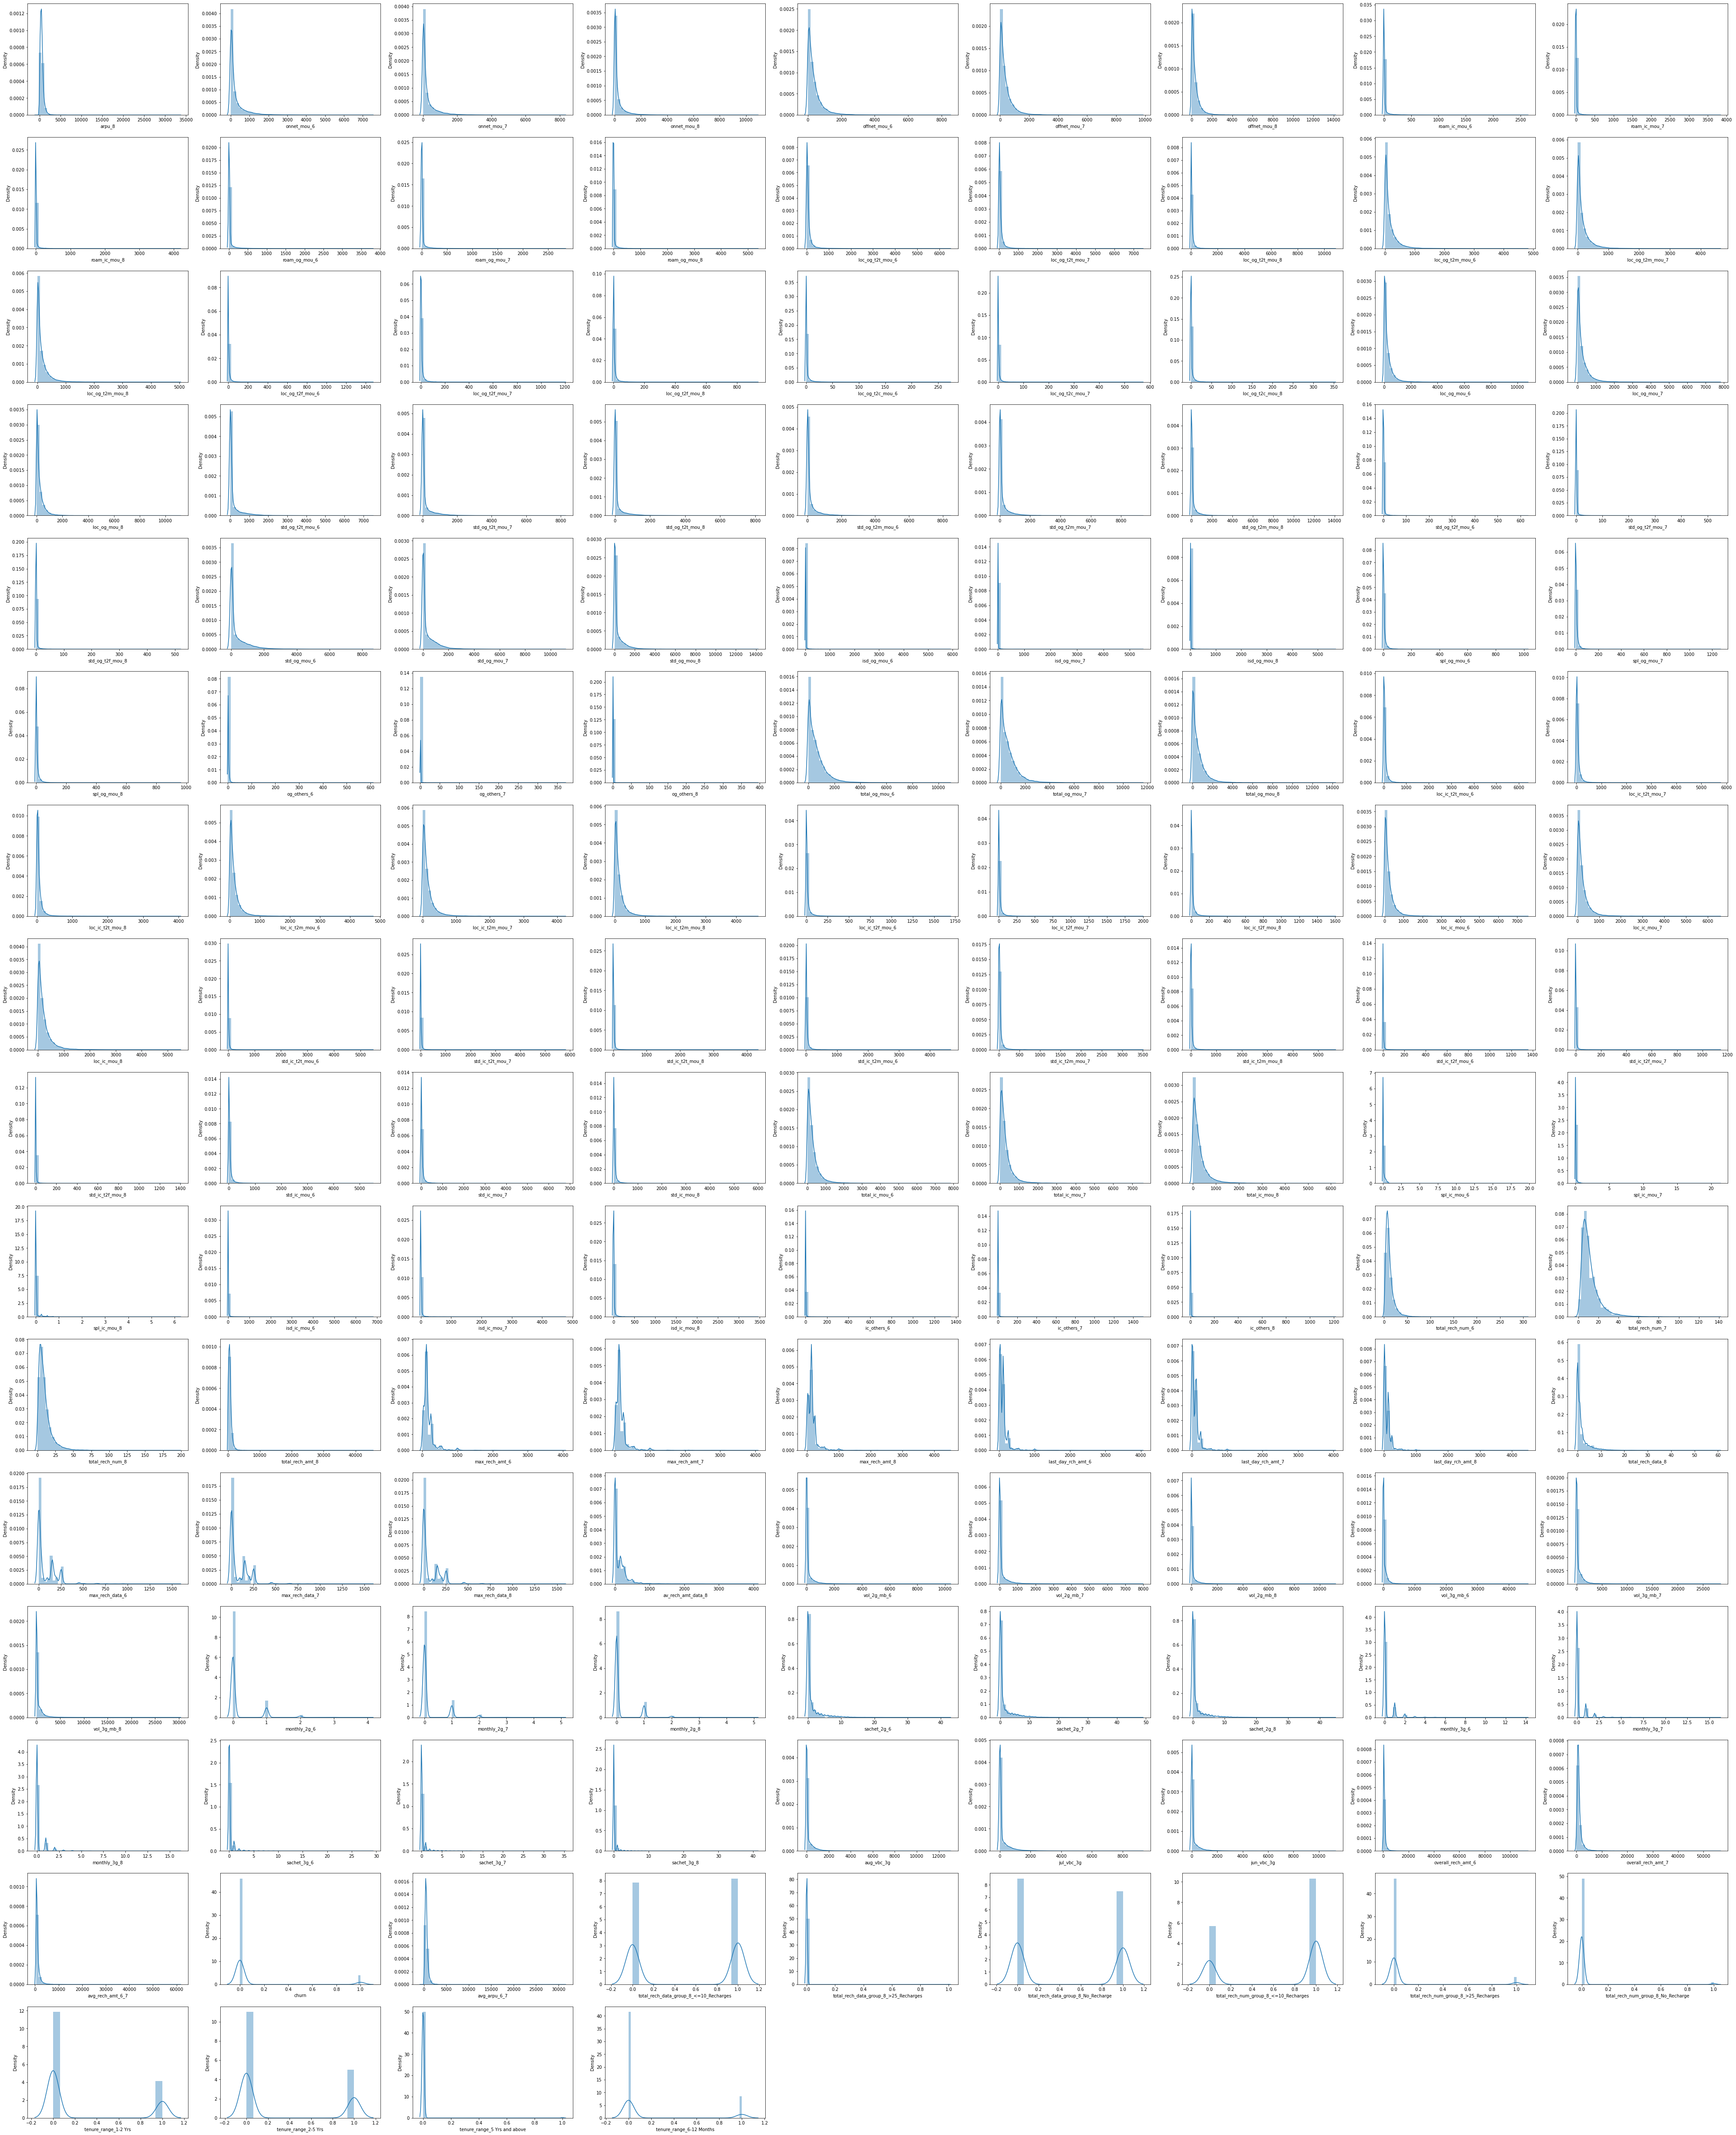

In [105]:
plt.figure(figsize = (70,95))
for i in enumerate(df.describe().columns):
    plt.subplot(17,9,i[0]+1)
    sns.distplot(df[i[1]])
    plt.xlabel(i[1])

In [106]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
df[df.columns] = pt.fit_transform(df[df.columns])

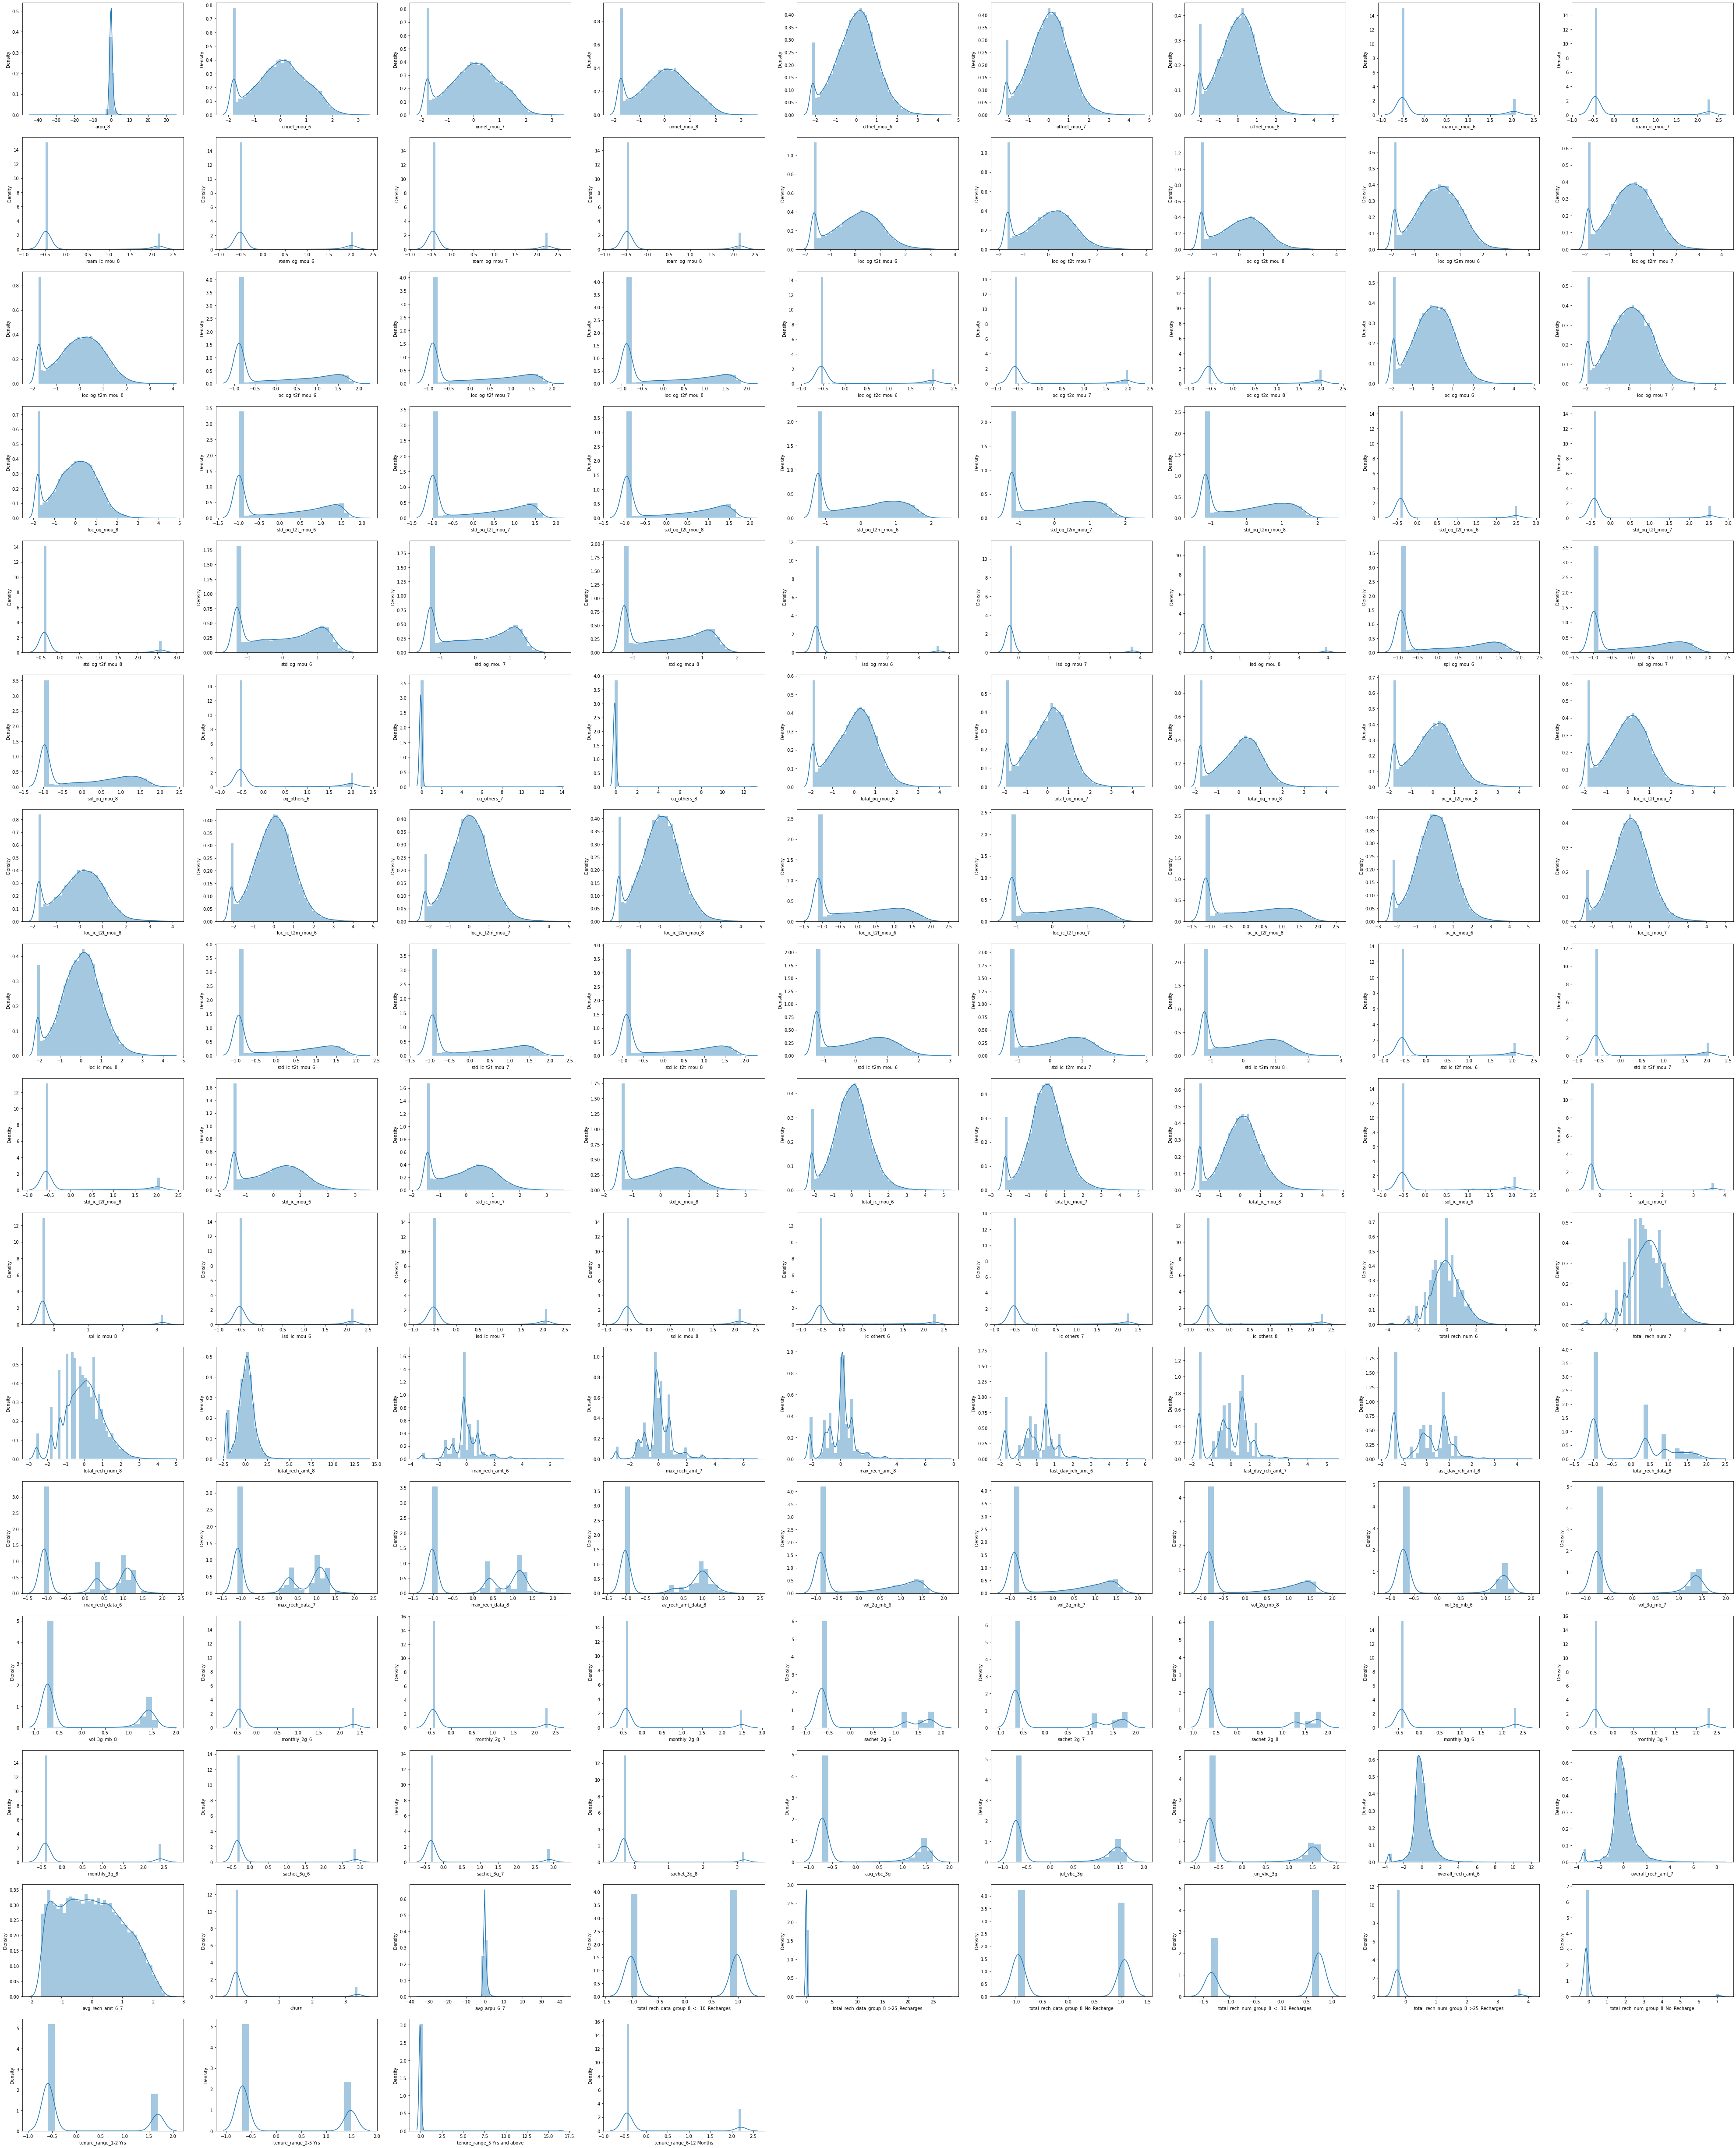

In [107]:
plt.figure(figsize = (70,95))
for i in enumerate(df.describe().columns):
    plt.subplot(17,9,i[0]+1)
    sns.distplot(df[i[1]])
    plt.xlabel(i[1])

In [133]:
df.head()

arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0    213.803        53.27    24.613333         0.00         84.23   
7   3171.480        57.84    54.680000        52.29        453.43   
8    137.362       413.69   351.030000        35.08         94.66   
21   637.760       102.41   132.110000        85.14        757.93   
23   366.966        48.96    50.660000        33.58         85.41   

    offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0      23.993333          0.00           0.00           0.00           0.00   
7     567.160000        325.91          16.23          33.49          31.64   
8      80.630000        136.48           0.00           0.00           0.00   
21    896.680000        983.39           0.00           0.00           0.00   
23     89.360000        205.89           0.00           0.00           0.00   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0            0.00           0.00           0.00             53.27   
7           23.74          12.59          38.06             51.39   
8            0.00           0.00           0.00            297.13   
21           0.00           0.00           0.00              4.48   
23           0.00           0.00           0.00             48.96   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0          24.613333              0.00             79.27         18.196667   
7          31.380000             40.28            308.63        447.380000   
8         217.590000             12.49             80.96         70.580000   
21          6.160000             23.34             91.81         87.930000   
23         50.660000             33.58             82.94         83.010000   

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0               0.00          0.403333          4.813333              0.00   
7             162.28         62.130000         55.140000             53.23   
8              50.54          0.000000          0.000000              0.00   
21            104.81          0.750000          0.000000              1.58   
23            148.56          0.000000          0.000000              0.00   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0           0.353333               0.0              0.00    132.953333   
7           0.000000               0.0              0.00    422.160000   
8           0.000000               0.0              7.15    378.090000   
21          0.000000               0.0              0.00     97.040000   
23          0.000000               0.0             17.71    131.910000   

    loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0      47.636667          0.00              0.00              0.00   
7     533.910000        255.79              4.30             23.29   
8     288.180000         63.04            116.56            133.43   
21     94.090000        129.74             97.93            125.94   
23    133.680000        182.14              0.00              0.00   

    std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0               0.00              0.41          0.976667              0.00   
7              12.01             49.89         31.760000             49.14   
8              22.58             13.69         10.040000             75.69   
21             61.79            665.36        808.740000            876.99   
23              0.00              2.36          6.350000             39.61   

    std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  \
0               0.00              0.00              0.00          0.41   
7               6.66             20.08             16.68         60.86   
8               0.00              0.00              0.00        130.26   
21              0.00              0.00              0.00        763.29   
23              0.00              0.00              0.00  

In [134]:
# lets create X dataset for model building.
X = df.drop(['churn'],axis=1)

In [135]:
X.head()

arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0    213.803        53.27    24.613333         0.00         84.23   
7   3171.480        57.84    54.680000        52.29        453.43   
8    137.362       413.69   351.030000        35.08         94.66   
21   637.760       102.41   132.110000        85.14        757.93   
23   366.966        48.96    50.660000        33.58         85.41   

    offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0      23.993333          0.00           0.00           0.00           0.00   
7     567.160000        325.91          16.23          33.49          31.64   
8      80.630000        136.48           0.00           0.00           0.00   
21    896.680000        983.39           0.00           0.00           0.00   
23     89.360000        205.89           0.00           0.00           0.00   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0            0.00           0.00           0.00             53.27   
7           23.74          12.59          38.06             51.39   
8            0.00           0.00           0.00            297.13   
21           0.00           0.00           0.00              4.48   
23           0.00           0.00           0.00             48.96   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0          24.613333              0.00             79.27         18.196667   
7          31.380000             40.28            308.63        447.380000   
8         217.590000             12.49             80.96         70.580000   
21          6.160000             23.34             91.81         87.930000   
23         50.660000             33.58             82.94         83.010000   

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0               0.00          0.403333          4.813333              0.00   
7             162.28         62.130000         55.140000             53.23   
8              50.54          0.000000          0.000000              0.00   
21            104.81          0.750000          0.000000              1.58   
23            148.56          0.000000          0.000000              0.00   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0           0.353333               0.0              0.00    132.953333   
7           0.000000               0.0              0.00    422.160000   
8           0.000000               0.0              7.15    378.090000   
21          0.000000               0.0              0.00     97.040000   
23          0.000000               0.0             17.71    131.910000   

    loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0      47.636667          0.00              0.00              0.00   
7     533.910000        255.79              4.30             23.29   
8     288.180000         63.04            116.56            133.43   
21     94.090000        129.74             97.93            125.94   
23    133.680000        182.14              0.00              0.00   

    std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0               0.00              0.41          0.976667              0.00   
7              12.01             49.89         31.760000             49.14   
8              22.58             13.69         10.040000             75.69   
21             61.79            665.36        808.740000            876.99   
23              0.00              2.36          6.350000             39.61   

    std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  \
0               0.00              0.00              0.00          0.41   
7               6.66             20.08             16.68         60.86   
8               0.00              0.00              0.00        130.26   
21              0.00              0.00              0.00        763.29   
23              0.00              0.00              0.00  

In [136]:
# lets create y dataset for model building.
y=df['churn']
y.head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int32

In [137]:
# split the dateset into train and test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=40)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

Dimension of X_train: (21000, 138)
Dimension of X_test: (9001, 138)


In [138]:
X_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 17753 to 38594
Data columns (total 138 columns):
 #   Column                                  Dtype  
---  ------                                  -----  
 0   arpu_8                                  float64
 1   onnet_mou_6                             float64
 2   onnet_mou_7                             float64
 3   onnet_mou_8                             float64
 4   offnet_mou_6                            float64
 5   offnet_mou_7                            float64
 6   offnet_mou_8                            float64
 7   roam_ic_mou_6                           float64
 8   roam_ic_mou_7                           float64
 9   roam_ic_mou_8                           float64
 10  roam_og_mou_6                           float64
 11  roam_og_mou_7                           float64
 12  roam_og_mou_8                           float64
 13  loc_og_t2t_mou_6                        float64
 14  loc_og_t2t_mou_7                 

In [139]:
num_col = X_train.select_dtypes(include = ['int64','float64']).columns.tolist()

In [140]:
# apply scaling on the dataset
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])

In [141]:
X_train.head()

arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
17753  0.021835     0.037048     0.010196     0.006951      0.155982   
27224  0.010045     0.136821     0.035611     0.011722      0.032934   
21517  0.004886     0.005813     0.006634     0.000086      0.044065   
35316  0.018773     0.011901     0.015844     0.003388      0.113261   
58797  0.073869     0.002300     0.000767     0.000536      0.057398   

       offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
17753      0.142503      0.061745       0.000000       0.000000   
27224      0.026662      0.005094       0.000000       0.000000   
21517      0.042624      0.000784       0.000000       0.000000   
35316      0.105836      0.039357       0.020839       0.010369   
58797      0.388222      0.450506       0.003949       0.000000   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
17753       0.000000       0.000000       0.000000       0.000000   
27224       0.020987       0.000000       0.000000       0.031729   
21517       0.000000       0.000000       0.000000       0.000000   
35316       0.001734       0.023692       0.031358       0.004289   
58797       0.000000       0.015271       0.000000       0.000000   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
17753          0.000903          0.000832          0.003072          0.019870   
27224          0.029062          0.006126          0.000287          0.022688   
21517          0.006428          0.005768          0.000086          0.072797   
35316          0.010541          0.014388          0.002891          0.013565   
58797          0.000828          0.000803          0.000536          0.030625   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
17753          0.027732          0.023135          0.000000          0.000109   
27224          0.019330          0.002092          0.003949          0.000000   
21517          0.062052          0.002213          0.001166          0.000426   
35316          0.033690          0.035591          0.003895          0.004773   
58797          0.014408          0.028805          0.000000          0.000000   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
17753               0.0          0.003905          0.004581          0.008214   
27224               0.0          0.000000          0.000000          0.000000   
21517               0.0          0.000000          0.000000          0.000000   
35316               0.0          0.000000          0.000000          0.000000   
58797               0.0          0.001793          0.003089          0.000000   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
17753      0.009376      0.017288      0.013389          0.036310   
27224      0.028189      0.017387      0.001221          0.111637   
21517      0.036396      0.042475      0.001079          0.000208   
35316      0.012936      0.034624      0.018812          0.002673   
58797      0.014110      0.009331      0.013468          0.000573   

       std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
17753          0.009922          0.005204          0.145444          0.131839   
27224          0.031409          0.001471          0.018129          0.014304   
21517          0.001181          0.000000          0.002344          0.002558   
35316          0.001553          0.000665          0.095154          0.075932   
58797          0.000000          0.000000          0.035332          0.402744   

       std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
17753          0.053371            0.0000          0.001928               0.0   
27224          0.000199            0.0000          0.000000               0.0   
21517          0.000000            0.0000          0.000000               0.0   
35316          0.025219            0.0182          0.000000            

### Using SMOTE method, we can balance the data w.r.t. churn variable and proceed further

In [165]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)

In [166]:
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

Dimension of X_train_sm Shape: (38562, 138)
Dimension of y_train_sm Shape: (38562,)


### Logistic Regression

In [167]:
# Importing necessary libraries for Model creation
import statsmodels.api as sm

In [168]:
# Logistic regression model
logm1 = sm.GLM(y_train_sm,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38562
Model:                            GLM   Df Residuals:                    38425
Model Family:                Binomial   Df Model:                          136
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13620.
Date:                Wed, 01 Dec 2021   Deviance:                       27240.
Time:                        13:10:46   Pearson chi2:                 7.68e+07
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.8928      0.307      2.903      0.004       0.290       1.495
arpu_8                                    35.4874      6.713      5.287      0.000      22.331      48.644
onnet_mou_6                              -49.9426     23.538     -2.122      0.034     -96.077      -3.808
onnet_mou_7                              -32.5387     23.774     -1.369      0.171     -79.135      14.057
onnet_mou_8                              -12.0326     33.792     -0.356      0.722     -78.264      54.199
offnet_mou_6                             -44.3864     26.389     -1.682      0.093     -96.108       7.335
offnet_mou_7                             -38.0869     21.090     -1.806      0.071     -79.423       3.249
offnet_mou_8                             -34.1193     43.282     -0.788      0.431    -118.950      50.712
roam_ic_mou_6                              0.7599      0.821      0.926      0.354      -0.848       2.368
roam_ic_mou_7                              2.0888      1.290      1.619      0.105      -0.440       4.618
roam_ic_mou_8                             -0.4417      1.007     -0.439      0.661      -2.415       1.532
roam_og_mou_6                             19.5115     10.030      1.945      0.052      -0.148      39.171
roam_og_mou_7                             17.2914      8.486      2.038      0.042       0.658      33.924
roam_og_mou_8                             14.9425     16.654      0.897      0.370     -17.698      47.583
loc_og_t2t_mou_6                        6.014e+04   2.02e+04      2.975      0.003    2.05e+04    9.98e+04
loc_og_t2t_mou_7                        -2.96e+04   2.29e+04     -1.293      0.196   -7.45e+04    1.53e+04
loc_og_t2t_mou_8                        2.425e+05   3.47e+04      6.992      0.000    1.75e+05     3.1e+05
loc_og_t2m_mou_6                        4.422e+04   1.49e+04      2.975      0.003    1.51e+04    7.34e+04
loc_og_t2m_mou_7                       -1.823e+04   1.41e+04     -1.292      0.196   -4.59e+04    9412.358
loc_og_t2m_mou_8                        1.119e+05    1.6e+04      6.993      0.000    8.05e+04    1.43e+05
loc_og_t2f_mou_6                        1.371e+04   4607.962      2.975      0.003    4678.820    2.27e+04
loc_og_t2f_mou_7                       -4791.2225   3702.332     -1.294      0.196    -1.2e+04    2465.214
loc_og_t2f_mou_8                        2.094e+04   2994.837      6.993      0.000    1.51e+04    2.68e+04
loc_og_t2c_mou_6                          -4.4457      1.064     -4.178      0.000      -6.532      -2.360
loc_og_t2c_mou_7                           4.9470      1.846      2.680      0.007       1.329       8.565
loc_og_t2c_mou_8                           2.5185      1.314      1.916      0.055     

#### Logistic Regression using Feature Selection (RFE method)

In [169]:
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))

[0 1 0 ... 0 0 1]
binary
binary
binary


In [170]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE

# running RFE with 20 variables as output
rfe = RFE(logreg, 20)             
rfe = rfe.fit(X_train, y_train)

In [171]:
rfe_columns=X_train_sm.columns[rfe.support_]
rfe_columns

Index(['roam_og_mou_7', 'loc_og_t2m_mou_8', 'std_og_mou_7', 'std_og_mou_8',
       'total_og_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'total_ic_mou_6',
       'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_6',
       'total_rech_num_8', 'max_rech_amt_8', 'last_day_rch_amt_8',
       'total_rech_data_8', 'av_rech_amt_data_8', 'monthly_2g_8',
       'sachet_2g_8', 'aug_vbc_3g', 'avg_rech_amt_6_7'],
      dtype='object')

In [172]:
list(zip(X_train_sm.columns, rfe.support_, rfe.ranking_))

[('arpu_8', False, 3),
 ('onnet_mou_6', False, 27),
 ('onnet_mou_7', False, 45),
 ('onnet_mou_8', False, 21),
 ('offnet_mou_6', False, 30),
 ('offnet_mou_7', False, 26),
 ('offnet_mou_8', False, 11),
 ('roam_ic_mou_6', False, 14),
 ('roam_ic_mou_7', False, 50),
 ('roam_ic_mou_8', False, 39),
 ('roam_og_mou_6', False, 6),
 ('roam_og_mou_7', True, 1),
 ('roam_og_mou_8', False, 9),
 ('loc_og_t2t_mou_6', False, 85),
 ('loc_og_t2t_mou_7', False, 107),
 ('loc_og_t2t_mou_8', False, 46),
 ('loc_og_t2m_mou_6', False, 69),
 ('loc_og_t2m_mou_7', False, 48),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 108),
 ('loc_og_t2f_mou_7', False, 119),
 ('loc_og_t2f_mou_8', False, 35),
 ('loc_og_t2c_mou_6', False, 53),
 ('loc_og_t2c_mou_7', False, 84),
 ('loc_og_t2c_mou_8', False, 100),
 ('loc_og_mou_6', False, 115),
 ('loc_og_mou_7', False, 98),
 ('loc_og_mou_8', False, 4),
 ('std_og_t2t_mou_6', False, 63),
 ('std_og_t2t_mou_7', False, 103),
 ('std_og_t2t_mou_8', False, 10),
 ('std_og_t2m_m

#### Assessing the model with StatsModels

In [173]:
X_train_SM = sm.add_constant(X_train_sm[rfe_columns])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38562
Model:                            GLM   Df Residuals:                    38541
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15512.
Date:                Wed, 01 Dec 2021   Deviance:                       31023.
Time:                        13:13:49   Pearson chi2:                 3.78e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.2124      0.033     37.217      0.000       1.149       1.276
roam_og_mou_7          6.6766      0.428     15.596      0.000       5.838       7.516
loc_og_t2m_mou_8      17.2610      1.644     10.499      0.000      14.039      20.483
std_og_mou_7           6.2684      0.335     18.737      0.000       5.613       6.924
std_og_mou_8          55.9568      3.635     15.393      0.000      48.832      63.082
total_og_mou_8       -75.8369      3.584    -21.159      0.000     -82.862     -68.812
loc_ic_t2m_mou_8      -4.3713      2.278     -1.919      0.055      -8.837       0.094
loc_ic_mou_8           1.9376      2.243      0.864      0.388      -2.459       6.334
total_ic_mou_6        10.4815      0.666     15.747      0.000       9.177      11.786
total_ic_mou_8       -29.3265      1.515    -19.358      0.000     -32.296     -26.357
spl_ic_mou_8          -5.0883      0.312    -16.283      0.000      -5.701      -4.476
total_rech_num_6       1.6960      0.344      4.933      0.000       1.022       2.370
total_rech_num_8      -3.4238      0.552     -6.206      0.000      -4.505      -2.343
max_rech_amt_8         5.4517      0.645      8.454      0.000       4.188       6.716
last_day_rch_amt_8   -16.9876      0.808    -21.032      0.000     -18.571     -15.405
total_rech_data_8    -12.6900      1.734     -7.320      0.000     -16.088      -9.292
av_rech_amt_data_8    -9.2690      0.730    -12.702      0.000     -10.699      -7.839
monthly_2g_8          -6.2068      0.348    -17.829      0.000      -6.889      -5.524
sachet_2g_8           -3.4562      1.245     -2.775      0.006      -5.897      -1.015
aug_vbc_3g           -12.6332      1.010    -12.514      0.000     -14.612     -10.655
avg_rech_amt_6_7      10.4764      0.717     14.604      0.000       9.070      11.882
======================================================================================
"""

In [174]:
# From the p-value of the individual columns, 
    # we can drop the column 'loc_ic_mou_8' as it has high p-value of 0.388
rfe_columns_1=rfe_columns.drop('loc_ic_mou_8',1)

In [175]:
# Training the model with the edited feature list
X_train_SM = sm.add_constant(X_train_sm[rfe_columns_1])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38562
Model:                            GLM   Df Residuals:                    38542
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15512.
Date:                Wed, 01 Dec 2021   Deviance:                       31024.
Time:                        13:13:52   Pearson chi2:                 3.41e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.2166      0.032     37.762      0.000       1.153       1.280
roam_og_mou_7          6.6617      0.427     15.584      0.000       5.824       7.500
loc_og_t2m_mou_8      17.1526      1.637     10.478      0.000      13.944      20.361
std_og_mou_7           6.2421      0.333     18.750      0.000       5.590       6.895
std_og_mou_8          55.6321      3.613     15.398      0.000      48.551      62.714
total_og_mou_8       -75.4852      3.559    -21.210      0.000     -82.461     -68.510
loc_ic_t2m_mou_8      -2.9386      1.579     -1.861      0.063      -6.034       0.157
total_ic_mou_6        10.5321      0.664     15.870      0.000       9.231      11.833
total_ic_mou_8       -28.7112      1.327    -21.634      0.000     -31.312     -26.110
spl_ic_mou_8          -5.0882      0.312    -16.295      0.000      -5.700      -4.476
total_rech_num_6       1.6928      0.344      4.923      0.000       1.019       2.367
total_rech_num_8      -3.4536      0.551     -6.271      0.000      -4.533      -2.374
max_rech_amt_8         5.4236      0.644      8.425      0.000       4.162       6.685
last_day_rch_amt_8   -16.9778      0.807    -21.028      0.000     -18.560     -15.395
total_rech_data_8    -12.7121      1.734     -7.330      0.000     -16.111      -9.313
av_rech_amt_data_8    -9.2476      0.729    -12.681      0.000     -10.677      -7.818
monthly_2g_8          -6.2064      0.348    -17.825      0.000      -6.889      -5.524
sachet_2g_8           -3.4551      1.246     -2.773      0.006      -5.897      -1.013
aug_vbc_3g           -12.6364      1.010    -12.517      0.000     -14.615     -10.658
avg_rech_amt_6_7      10.4772      0.717     14.603      0.000       9.071      11.883
======================================================================================
"""

In [176]:
# From the p-value of the individual columns, 
    # we can drop the column 'loc_ic_t2m_mou_8' as it has high p-value of 0.80
rfe_columns_2=rfe_columns_1.drop('loc_ic_t2m_mou_8',1)

In [177]:
# Training the model with the edited feature list
X_train_SM = sm.add_constant(X_train_sm[rfe_columns_2])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38562
Model:                            GLM   Df Residuals:                    38543
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15514.
Date:                Wed, 01 Dec 2021   Deviance:                       31028.
Time:                        13:14:06   Pearson chi2:                 4.48e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.2105      0.032     37.795      0.000       1.148       1.273
roam_og_mou_7          6.7117      0.429     15.662      0.000       5.872       7.552
loc_og_t2m_mou_8      16.0705      1.532     10.489      0.000      13.068      19.073
std_og_mou_7           6.2862      0.332     18.915      0.000       5.635       6.938
std_og_mou_8          54.2612      3.529     15.375      0.000      47.344      61.178
total_og_mou_8       -74.0816      3.470    -21.351      0.000     -80.882     -67.281
total_ic_mou_6        10.5031      0.663     15.848      0.000       9.204      11.802
total_ic_mou_8       -30.4317      0.973    -31.269      0.000     -32.339     -28.524
spl_ic_mou_8          -5.0830      0.312    -16.278      0.000      -5.695      -4.471
total_rech_num_6       1.6926      0.344      4.926      0.000       1.019       2.366
total_rech_num_8      -3.4458      0.551     -6.257      0.000      -4.525      -2.366
max_rech_amt_8         5.4813      0.643      8.520      0.000       4.220       6.742
last_day_rch_amt_8   -17.0070      0.808    -21.049      0.000     -18.591     -15.423
total_rech_data_8    -12.6354      1.732     -7.296      0.000     -16.030      -9.241
av_rech_amt_data_8    -9.2794      0.729    -12.726      0.000     -10.709      -7.850
monthly_2g_8          -6.2073      0.348    -17.833      0.000      -6.890      -5.525
sachet_2g_8           -3.5024      1.244     -2.814      0.005      -5.941      -1.063
aug_vbc_3g           -12.6182      1.009    -12.503      0.000     -14.596     -10.640
avg_rech_amt_6_7      10.4378      0.717     14.560      0.000       9.033      11.843
======================================================================================
"""

In [178]:
# Getting the predicted values on the train set
y_train_sm_pred = res.predict(X_train_SM)
y_train_sm_pred = y_train_sm_pred.values.reshape(-1)
y_train_sm_pred[:10]

array([0.49124586, 0.81477572, 0.83938325, 0.45436776, 0.00108565,
       0.50956683, 0.2480415 , 0.59651774, 0.11477423, 0.13559525])

#### Creating a dataframe with the actual churn flag and the predicted probabilities

In [180]:
y_train_sm_pred_final = pd.DataFrame({'Converted':y_train_sm.values, 'Converted_prob':y_train_sm_pred})
y_train_sm_pred_final.head()

Converted  Converted_prob
0          0        0.491246
1          1        0.814776
2          0        0.839383
3          0        0.454368
4          0        0.001086

#### Creating new column 'churn_pred' with 1 if Churn_Prob > 0.5 else 0

In [181]:
y_train_sm_pred_final['churn_pred'] = y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Viewing the prediction results
y_train_sm_pred_final.head()

Converted  Converted_prob  churn_pred
0          0        0.491246           0
1          1        0.814776           1
2          0        0.839383           1
3          0        0.454368           0
4          0        0.001086           0

In [182]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred )
print(confusion)

[[15623  3658]
 [ 2822 16459]]


In [183]:
# Predicted     not_churn    churn
# Actual
# not_churn        15661      3627
# churn            2775       16513 

In [184]:
# Checking the overall accuracy.
print("The overall accuracy of the model is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred))

The overall accuracy of the model is: 0.8319589232923603


In [185]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [187]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [188]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity = ",TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP/ float(TN+FP))

# positive predictive value 
print ("Precision = ",TP / float(TP+FP))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN / float(TN+ FN))

Sensitivity =  0.8536382967688398
Specificity =  0.8102795498158809
False Positive Rate =  0.1897204501841191
Precision =  0.8181637421086643
True Negative Prediction Rate =  0.8470046082949308


#### Plotting the ROC Curve

In [189]:
# Defining a function to plot the roc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Prediction Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [190]:
# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob, drop_intermediate = False )

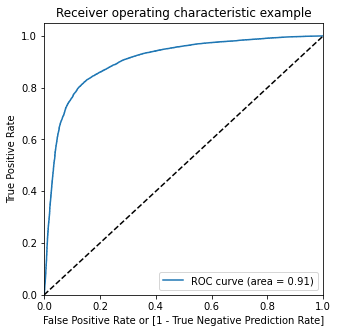

In [192]:
#Plotting the curve for the obtained metrics
draw_roc(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

#### Finding Optimal Cutoff Point

In [193]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

Converted  Converted_prob  churn_pred  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0        0.491246           0    1    1    1    1    1    0    0   
1          1        0.814776           1    1    1    1    1    1    1    1   
2          0        0.839383           1    1    1    1    1    1    1    1   
3          0        0.454368           0    1    1    1    1    1    0    0   
4          0        0.001086           0    1    0    0    0    0    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    1    1    0  
2    1    1    0  
3    0    0    0  
4    0    0    0

In [194]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.692755     0.973342     0.412167
0.2          0.2  0.753592     0.951144     0.556040
0.3          0.3  0.793864     0.926560     0.661169
0.4          0.4  0.816685     0.892070     0.741300
0.5          0.5  0.831959     0.853638     0.810280
0.6          0.6  0.838675     0.807738     0.869613
0.7          0.7  0.826228     0.736580     0.915876
0.8          0.8  0.775790     0.597272     0.954307
0.9          0.9  0.616955     0.247861     0.986048


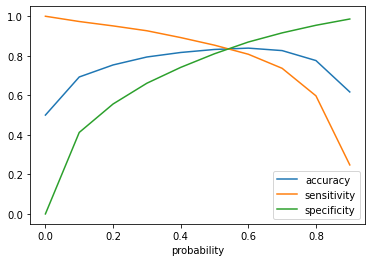

In [195]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

Initially we selected the optimm point of classification as 0.5.

From the above graph, we can see the optimum cutoff is slightly higher than 0.5 but lies lower than 0.6. So lets tweek a little more within this range.

In [196]:
# Let's create columns with refined probability cutoffs 
numbers = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

Converted  Converted_prob  churn_pred  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0        0.491246           0    1    1    1    1    1    0    0   
1          1        0.814776           1    1    1    1    1    1    1    1   
2          0        0.839383           1    1    1    1    1    1    1    1   
3          0        0.454368           0    1    1    1    1    1    0    0   
4          0        0.001086           0    1    0    0    0    0    0    0   

   0.7  0.8  0.9  0.51  0.52  0.53  0.54  0.55  0.56  0.57  0.58  0.59  
0    0    0    0     0     0     0     0     0     0     0     0     0  
1    1    1    0     1     1     1     1     1     1     1     1     1  
2    1    1    0     1     1     1     1     1     1     1     1     1  
3    0    0    0     0     0     0     0     0     0     0     0     0  
4    0    0    0     0     0     0     0     0     0     0     0     0

In [197]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

      probability  accuracy  sensitivity  specificity
0.50         0.50  0.831959     0.853638     0.810280
0.51         0.51  0.833774     0.849800     0.817748
0.52         0.52  0.835175     0.845444     0.824905
0.53         0.53  0.835927     0.841191     0.830662
0.54         0.54  0.836808     0.837094     0.836523
0.55         0.55  0.837975     0.832789     0.843162
0.56         0.56  0.838857     0.828951     0.848763
0.57         0.57  0.838649     0.824231     0.853068
0.58         0.58  0.838753     0.819045     0.858462
0.59         0.59  0.839012     0.813806     0.864219


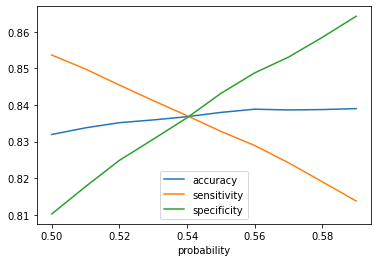

In [198]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

From the above graph we can conclude, the optimal cutoff point in the probability to define the predicted churn variabe converges at 0.54

In [199]:
#### From the curve above, 0.2 is the optimum point to take it as a cutoff probability.

y_train_sm_pred_final['final_churn_pred'] = y_train_sm_pred_final.Converted_prob.map( lambda x: 1 if x > 0.54 else 0)

y_train_sm_pred_final.head()

Converted  Converted_prob  churn_pred  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0        0.491246           0    1    1    1    1    1    0    0   
1          1        0.814776           1    1    1    1    1    1    1    1   
2          0        0.839383           1    1    1    1    1    1    1    1   
3          0        0.454368           0    1    1    1    1    1    0    0   
4          0        0.001086           0    1    0    0    0    0    0    0   

   0.7  0.8  0.9  0.51  0.52  0.53  0.54  0.55  0.56  0.57  0.58  0.59  \
0    0    0    0     0     0     0     0     0     0     0     0     0   
1    1    1    0     1     1     1     1     1     1     1     1     1   
2    1    1    0     1     1     1     1     1     1     1     1     1   
3    0    0    0     0     0     0     0     0     0     0     0     0   
4    0    0    0     0     0     0     0     0     0     0     0     0   

   final_churn_pred  
0                 0  
1                 1  
2                 1  
3                 0  
4                 0

In [200]:
# Calculating the ovearall accuracy again
print("The overall accuracy of the model now is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred))

The overall accuracy of the model now is: 0.8368082568331519


In [201]:
confusion2 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred )
print(confusion2)

[[16129  3152]
 [ 3141 16140]]


In [202]:
TP2 = confusion2[1,1] # true positive 
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP2 / float(TP2+FN2))

# Let us calculate specificity
print("Specificity = ",TN2 / float(TN2+FP2))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP2/ float(TN2+FP2))

# positive predictive value 
print ("Precision = ",TP2 / float(TP2+FP2))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN2 / float(TN2 + FN2))

Sensitivity =  0.837093511747316
Specificity =  0.8365230019189877
False Positive Rate =  0.1634769980810124
Precision =  0.8366162139747045
True Negative Prediction Rate =  0.8370005189413596


#### Precision and recall tradeoff

In [204]:
from sklearn.metrics import precision_recall_curve

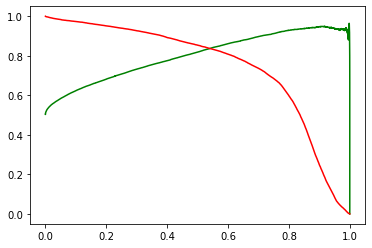

In [205]:
p, r, thresholds = precision_recall_curve(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

# Plotting the curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

***Making predictions on the test set***

In [206]:
# Scaling the test data
X_test[num_col] = scaler.transform(X_test[num_col])
X_test.head()

arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
95023  0.013974     0.004560     0.002976     0.006745      0.085689   
12938  0.019683     0.020336     0.030174     0.052348      0.123325   
23331  0.035029     0.030510     0.026441     0.037445      0.075273   
62425  0.013922     0.007532     0.002527     0.001268      0.016352   
50916  0.016011     0.031265     0.027834     0.015932      0.169732   

       offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
95023      0.089550      0.036115       0.000000       0.000000   
12938      0.201645      0.044851       0.000000       0.000000   
23331      0.129704      0.052468       0.052550       0.000000   
62425      0.026369      0.008551       0.000000       0.000000   
50916      0.118542      0.047464       0.006195       0.014164   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
95023       0.000000       0.000000       0.000000       0.000000   
12938       0.000000       0.000000       0.000000       0.000000   
23331       0.038081       0.155523       0.000000       0.085414   
62425       0.000000       0.000000       0.000000       0.000000   
50916       0.000000       0.020773       0.068093       0.000000   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
95023          0.004716          0.003113          0.006571          0.047546   
12938          0.000367          0.000370          0.000070          0.001372   
23331          0.015851          0.027245          0.018710          0.023919   
62425          0.008639          0.002643          0.001268          0.022530   
50916          0.001424          0.003181          0.005925          0.070196   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
95023          0.085253          0.064773          0.242314          0.081752   
12938          0.001982          0.002259          0.000000          0.000000   
23331          0.093892          0.059982          0.006555          0.053961   
62425          0.039090          0.023457          0.001303          0.005984   
50916          0.030976          0.036736          0.000000          0.000593   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
95023          0.089920          0.000000          0.000000               0.0   
12938          0.000000          0.000111          0.000000               0.0   
23331          0.017480          0.000000          0.000000               0.0   
62425          0.003651          0.000000          0.000000               0.0   
50916          0.000000          0.000000          0.001545               0.0   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
95023      0.057356      0.066371      0.043074          0.000449   
12938      0.000832      0.001535      0.001083          0.020042   
23331      0.021111      0.090436      0.046650          0.000934   
62425      0.015412      0.026695      0.012084          0.000000   
50916      0.032056      0.021555      0.022281          0.029218   

       std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
95023          0.000000          0.000232          0.002573          0.001499   
12938          0.031478          0.070140          0.123246          0.212674   
23331          0.000417          0.001253          0.015049          0.063598   
62425          0.000000          0.000000          0.000076          0.000000   
50916          0.020671          0.013425          0.123621          0.081118   

       std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
95023          0.000000          0.172585          0.176652          0.190633   
12938          0.044231          0.000000          0.000000          0.000000   
23331          0.011168          0.009673          0.000000          0.001644   
62425          0.000000          0.043958          0.000790          0.

In [207]:
# Feature selection
X_test=X_test[rfe_columns_2]
X_test.head()

roam_og_mou_7  loc_og_t2m_mou_8  std_og_mou_7  std_og_mou_8  \
95023       0.000000          0.064773      0.013065      0.007182   
12938       0.000000          0.002259      0.201785      0.084346   
23331       0.000000          0.059982      0.052221      0.011923   
62425       0.000000          0.023457      0.000053      0.000000   
50916       0.068093          0.036736      0.084788      0.041540   

       total_og_mou_8  total_ic_mou_6  total_ic_mou_8  spl_ic_mou_8  \
95023        0.041250        0.042714        0.133952      0.000000   
12938        0.084910        0.003964        0.009620      0.793651   
23331        0.048544        0.026281        0.037612      0.000000   
62425        0.009500        0.033649        0.022955      0.000000   
50916        0.059729        0.054604        0.052985      0.000000   

       total_rech_num_6  total_rech_num_8  max_rech_amt_8  last_day_rch_amt_8  \
95023          0.011765          0.020408        0.123623            0.000000   
12938          0.082353          0.051020        0.029220            0.029220   
23331          0.041176          0.061224        0.056642            0.056642   
62425          0.023529          0.025510        0.034615            0.015734   
50916          0.076471          0.045918        0.032367            0.005619   

       total_rech_data_8  av_rech_amt_data_8  monthly_2g_8  sachet_2g_8  \
95023           0.000000            0.000000           0.0     0.000000   
12938           0.000000            0.000000           0.0     0.000000   
23331           0.066667            0.079045           0.0     0.068182   
62425           0.016667            0.037922           0.2     0.000000   
50916           0.033333            0.012312           0.0     0.022727   

       aug_vbc_3g  avg_rech_amt_6_7  
95023         0.0          0.010594  
12938         0.0          0.007537  
23331         0.0          0.010447  
62425         0.0          0.000241  
50916         0.0          0.011989

In [208]:
# Adding constant to the test model.
X_test_SM = sm.add_constant(X_test)

In [209]:
y_test_pred = res.predict(X_test_SM)
y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

0
95023  0.038324
12938  0.022356
23331  0.021566
62425  0.199647
50916  0.298233

In [210]:
y_pred=y_pred.rename(columns = {0:"Conv_prob"})

In [211]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

churn
95023      0
12938      0
23331      0
62425      0
50916      0

In [212]:
y_pred_final = pd.concat([y_test_df,y_pred],axis=1)
y_pred_final.head()

churn  Conv_prob
95023      0   0.038324
12938      0   0.022356
23331      0   0.021566
62425      0   0.199647
50916      0   0.298233

In [213]:
y_pred_final['test_churn_pred'] = y_pred_final.Conv_prob.map(lambda x: 1 if x>0.54 else 0)
y_pred_final.head()

churn  Conv_prob  test_churn_pred
95023      0   0.038324                0
12938      0   0.022356                0
23331      0   0.021566                0
62425      0   0.199647                0
50916      0   0.298233                0

In [214]:
# Checking the overall accuracy of the predicted set.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.test_churn_pred)

0.832018664592823

In [216]:
# Confusion Matrix
confusion2_test = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.test_churn_pred)
print("Confusion Matrix\n",confusion2_test)

Confusion Matrix
 [[6907 1372]
 [ 140  582]]


In [217]:
# Calculating model validation parameters
TP3 = confusion2_test[1,1] # true positive 
TN3 = confusion2_test[0,0] # true negatives
FP3 = confusion2_test[0,1] # false positives
FN3 = confusion2_test[1,0] # false negatives

In [218]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP3 / float(TP3+FN3))

# Let us calculate specificity
print("Specificity = ",TN3 / float(TN3+FP3))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP3/ float(TN3+FP3))

# positive predictive value 
print ("Precision = ",TP3 / float(TP3+FP3))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN3 / float(TN3+FN3))

Sensitivity =  0.8060941828254847
Specificity =  0.834279502355357
False Positive Rate =  0.16572049764464308
Precision =  0.2978505629477994
True Negative Prediction Rate =  0.9801333900950759


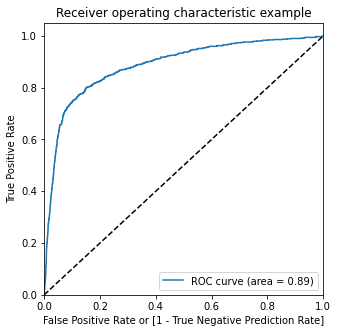

In [219]:
# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.churn,y_pred_final.Conv_prob, drop_intermediate = False )
# Plotting the curve for the obtained metrics
draw_roc(y_pred_final.churn,y_pred_final.Conv_prob)

The AUC score for train dataset is 0.90 and the test dataset is 0.87.
**This model can be considered as a good model.**

### Logistic Regression using PCA

In [220]:
# split the dateset into train and test datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

# apply scaling on the dataset

scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_test[num_col] = scaler.transform(X_test[num_col])

# Applying SMOTE technique for data imbalance correction

sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

X_train_sm.head()

Dimension of X_train: (21000, 138)
Dimension of X_test: (9001, 138)
Dimension of X_train_sm Shape: (38576, 138)
Dimension of y_train_sm Shape: (38576,)


arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0  0.038904     0.000235     0.000531     0.000238      0.004211   
1  0.032921     0.000493     0.000000     0.000000      0.001631   
2  0.033826     0.000876     0.000275     0.000714      0.003861   
3  0.081645     0.163879     0.105394     0.050406      0.142667   
4  0.042893     0.079633     0.051881     0.004868      0.058346   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0      0.003651      0.004095            0.0       0.000000            0.0   
1      0.000000      0.000000            0.0       0.000000            0.0   
2      0.007485      0.003679            0.0       0.000000            0.0   
3      0.177782      0.052962            0.0       0.029033            0.0   
4      0.046732      0.010097            0.0       0.000000            0.0   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0            0.0        0.00000            0.0          0.000269   
1            0.0        0.00000            0.0          0.000566   
2            0.0        0.00000            0.0          0.001004   
3            0.0        0.38273            0.0          0.006618   
4            0.0        0.00000            0.0          0.027427   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0          0.000585          0.000238          0.007005          0.006330   
1          0.000000          0.000000          0.002533          0.000000   
2          0.000303          0.000714          0.006148          0.016108   
3          0.004620          0.004439          0.009939          0.011659   
4          0.015820          0.000682          0.064953          0.089951   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0          0.015246          0.003075          0.000000          0.000980   
1          0.000000          0.002454          0.000000          0.000000   
2          0.014527          0.000000          0.000529          0.000000   
3          0.012824          0.011501          0.000454          0.004373   
4          0.034307          0.000000          0.000425          0.000000   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0          0.000000          0.010426          0.006708      0.003471   
1          0.000000          0.000000          0.000000      0.001624   
2          0.000000          0.000000          0.000000      0.003339   
3          0.000000          0.000000          0.000000      0.009147   
4          0.001326          0.001510          0.000000      0.045438   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0      0.004240      0.005214          0.000000          0.000000   
1      0.000000      0.000000          0.000000          0.000000   
2      0.009721      0.005363          0.000000          0.000000   
3      0.011289      0.008813          0.158327          0.089871   
4      0.067550      0.011688          0.055797          0.037639   

   std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0          0.000000          0.000000          0.000000          0.000000   
1          0.000000          0.000000          0.000000          0.000000   
2          0.000000          0.000000          0.000000          0.000000   
3          0.061671          0.136893          0.111320          0.049264   
4          0.005616          0.019812          0.004909          0.001171   

   std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  \
0          0.000000               0.0               0.0      0.000000   
1          0.000000               0.0               0.0      0.000000   
2          0.000000               0.0               0.0      0.000000   
3          0.000000               0.0               0.0      0.273279   
4          0.015607               0.0               0.0      0.069439   

   std_og_mou_7  std_og_mou_8  isd_o

In [221]:
# importing PCA
from sklearn.decomposition import PCA
pca = PCA(random_state=42)

# applying PCA on train data
pca.fit(X_train_sm)

PCA(random_state=42)

In [222]:
X_train_sm_pca=pca.fit_transform(X_train_sm)
print("Dimension of X_train_sm_pca: ",X_train_sm_pca.shape)

X_test_pca=pca.transform(X_test)
print("Dimension of X_test_pca: ",X_test_pca.shape)

Dimension of X_train_sm_pca:  (38576, 138)
Dimension of X_test_pca:  (9001, 138)


In [223]:
#Viewing the PCA components
pca.components_

array([[ 9.19669218e-03, -1.59029580e-02, -8.69362867e-03, ...,
        -2.65552127e-03,  8.74500105e-04, -4.12140751e-02],
       [ 4.33178270e-03,  1.76986297e-03,  1.70492259e-03, ...,
         7.47063746e-01, -2.99020385e-04, -7.14561220e-02],
       [ 1.41270215e-02,  1.08592442e-02,  1.64673677e-02, ...,
         8.34457035e-02, -8.97937524e-04, -2.85033066e-01],
       ...,
       [-2.40712079e-07, -8.63706732e-07,  2.14324881e-06, ...,
         1.98860366e-10,  7.04916124e-09, -2.81004408e-09],
       [-0.00000000e+00,  6.48477420e-16, -9.90367553e-16, ...,
        -2.13194806e-18,  2.76022191e-17, -1.67337528e-18],
       [ 0.00000000e+00, -2.91252844e-14, -9.87242503e-15, ...,
         2.10932966e-17, -1.14588527e-17,  2.28353799e-17]])

#### Performing Logistic Regression

In [224]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg_pca = LogisticRegression()
logreg_pca.fit(X_train_sm_pca, y_train_sm)

# making the predictions
y_pred = logreg_pca.predict(X_test_pca)

# converting the prediction into a dataframe
y_pred_df = pd.DataFrame(y_pred)
print("Dimension of y_pred_df:", y_pred_df.shape)

Dimension of y_pred_df: (9001, 1)


In [225]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Checking the Confusion matrix
print("Confusion Matirx for y_test & y_pred\n",confusion_matrix(y_test,y_pred),"\n")

# Checking the Accuracy of the Predicted model.
print("Accuracy of the logistic regression model with PCA: ",accuracy_score(y_test,y_pred))

Confusion Matirx for y_test & y_pred
 [[6751 1521]
 [ 128  601]] 

Accuracy of the logistic regression model with PCA:  0.8167981335407177


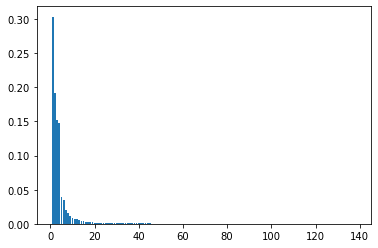

In [226]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)
plt.show()

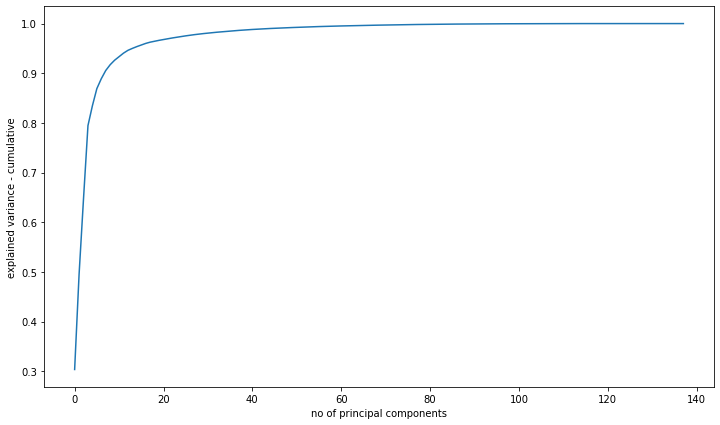

In [227]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

# Making a scree plot
fig = plt.figure(figsize=[12,7])
plt.plot(var_cumu)
plt.xlabel('no of principal components')
plt.ylabel('explained variance - cumulative')
plt.show()

In [228]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)

array([30.3, 49.5, 64.8, 79.5, 83.5, 86.9, 88.9, 90.6, 91.8, 92.7, 93.4,
       94.1, 94.7, 95.1, 95.5, 95.8, 96.1, 96.4, 96.6, 96.8, 97. , 97.2,
       97.4, 97.5, 97.6, 97.7, 97.8, 97.9, 98. , 98.1, 98.2, 98.3, 98.4,
       98.5, 98.6, 98.7, 98.8, 98.9, 99. , 99.1, 99.2, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3])

*90% of the data can be explained with 8 PCA components

In [229]:
pca_8 = PCA(n_components=15)

train_pca_8 = pca_8.fit_transform(X_train_sm)
print("Dimension for Train dataset using PCA: ", train_pca_8.shape)

test_pca_8 = pca_8.transform(X_test)
print("Dimension for Test dataset using PCA: ", test_pca_8.shape)

Dimension for Train dataset using PCA:  (38576, 15)
Dimension for Test dataset using PCA:  (9001, 15)


In [230]:
logreg_pca_8 = LogisticRegression()
logreg_pca_8.fit(train_pca_8, y_train_sm)

# making the predictions
y_pred_8 = logreg_pca_8.predict(test_pca_8)

# converting the prediction into a dataframe
y_pred_df_8 = pd.DataFrame(y_pred_8)
print("Dimension of y_pred_df_8: ", y_pred_df_8.shape)

Dimension of y_pred_df_8:  (9001, 1)


In [231]:
# Checking the Confusion matrix
print("Confusion Matirx for y_test & y_pred\n",confusion_matrix(y_test,y_pred_8),"\n")

# Checking the Accuracy of the Predicted model.
print("Accuracy of the logistic regression model with PCA: ",accuracy_score(y_test,y_pred_8))

Confusion Matirx for y_test & y_pred
 [[6379 1893]
 [ 185  544]] 

Accuracy of the logistic regression model with PCA:  0.7691367625819353


### Decision Tree using PCA

In [232]:
from sklearn.tree import DecisionTreeClassifier

In [233]:
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(train_pca_8, y_train_sm)

DecisionTreeClassifier(max_depth=5)

In [237]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(test_pca_8)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88      8272
           1       0.25      0.69      0.36       729

    accuracy                           0.80      9001
   macro avg       0.61      0.75      0.62      9001
weighted avg       0.91      0.80      0.84      9001



In [238]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[6729 1543]
 [ 228  501]]
0.8032440839906677


In [239]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(train_pca_8, y_train_sm)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': range(1, 40)}, return_train_score=True,
             scoring='accuracy')

In [240]:
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.077685      0.007420         0.001715        0.001332   
1       0.120502      0.010754         0.000427        0.000853   
2       0.179834      0.008933         0.001411        0.000465   
3       0.215844      0.008548         0.000874        0.001295   
4       0.255288      0.005525         0.003444        0.003469   

  param_max_depth            params  split0_test_score  split1_test_score  \
0               1  {'max_depth': 1}           0.707621           0.709916   
1               2  {'max_depth': 2}           0.707621           0.702139   
2               3  {'max_depth': 3}           0.739891           0.739209   
3               4  {'max_depth': 4}           0.750648           0.763059   
4               5  {'max_depth': 5}           0.774883           0.782890   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.702139           0.702139           0.720415         0.708446   
1           0.702139           0.702139           0.716397         0.706087   
2           0.724563           0.747116           0.746079         0.739372   
3           0.766040           0.765781           0.763448         0.761795   
4           0.779391           0.781076           0.772651         0.778178   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.006718               38            0.709170            0.708402   
1        0.005575               39            0.709170            0.709115   
2        0.008057               37            0.744848            0.746930   
3        0.005701               36            0.764938            0.767149   
4        0.003834               35            0.785677            0.787337   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.710476            0.710541            0.705972   
1            0.710476            0.710541            0.707171   
2            0.724766            0.745958            0.746800   
3            0.765756            0.765076            0.765140   
4            0.778977            0.788341            0.778296   

   mean_train_score  std_train_score  
0          0.708912         0.001677  
1          0.709295         0.001225  
2          0.741860         0.008579  
3          0.765612         0.000818  
4          0.783726         0.004247

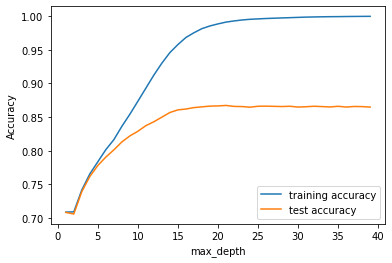

In [241]:
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Now we will tune Minimum samples leaf

In [242]:
# GridSearchCV to find optimal min_samples_leafe
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(train_pca_8, y_train_sm)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [243]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.651298      0.029734         0.003345        0.002660   
1       0.565796      0.062469         0.002952        0.002738   
2       0.508514      0.022233         0.002972        0.002951   
3       0.510307      0.042352         0.001767        0.001242   
4       0.455541      0.013458         0.003041        0.003363   

  param_min_samples_leaf                    params  split0_test_score  \
0                      5   {'min_samples_leaf': 5}           0.845257   
1                     25  {'min_samples_leaf': 25}           0.827372   
2                     45  {'min_samples_leaf': 45}           0.819077   
3                     65  {'min_samples_leaf': 65}           0.808061   
4                     85  {'min_samples_leaf': 85}           0.806765   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.844977           0.858328           0.845237           0.847699   
1           0.824498           0.834608           0.822035           0.827738   
2           0.815424           0.827997           0.815424           0.821128   
3           0.813739           0.824887           0.806610           0.814906   
4           0.809203           0.812832           0.802592           0.809332   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.848300        0.005111                1            0.944686   
1         0.827250        0.004223                2            0.869896   
2         0.819810        0.004643                3            0.848121   
3         0.813641        0.006460                4            0.838399   
4         0.808145        0.003383                5            0.827673   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.945951            0.944947            0.946275   
1            0.869965            0.869350            0.870711   
2            0.845922            0.845533            0.845144   
3            0.833155            0.834808            0.831859   
4            0.824763            0.826966            0.823013   

   split4_train_score  mean_train_score  std_train_score  
0            0.945012          0.945374         0.000622  
1            0.867470          0.869478         0.001094  
2            0.845663          0.846077         0.001052  
3            0.833609          0.834366         0.002227  
4            0.825443          0.825572         0.001648

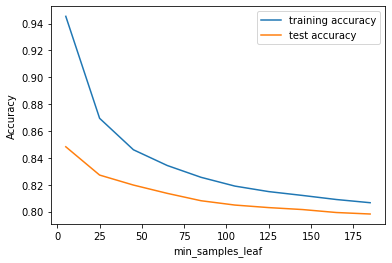

In [244]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Now we will tune min_samples_split

In [245]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(train_pca_8, y_train_sm)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_split': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [246]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.743935      0.045790         0.002186        0.001163   
1       0.735731      0.041705         0.001631        0.001384   
2       0.735749      0.052426         0.000533        0.001067   
3       0.719361      0.065693         0.002394        0.002933   
4       0.688307      0.028282         0.001386        0.000975   

  param_min_samples_split                     params  split0_test_score  \
0                       5   {'min_samples_split': 5}           0.860550   
1                      25  {'min_samples_split': 25}           0.840073   
2                      45  {'min_samples_split': 45}           0.833593   
3                      65  {'min_samples_split': 65}           0.821669   
4                      85  {'min_samples_split': 85}           0.821540   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.863513           0.868049           0.863772           0.859754   
1           0.847310           0.849125           0.844588           0.843811   
2           0.838626           0.834478           0.831497           0.834608   
3           0.833571           0.830979           0.824757           0.827090   
4           0.826572           0.832534           0.820091           0.823720   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.863127        0.002926                1            0.989566   
1         0.844981        0.003105                2            0.934705   
2         0.834560        0.002318                3            0.909786   
3         0.827613        0.004256                4            0.889987   
4         0.824891        0.004402                5            0.874563   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.989890            0.989048            0.989923   
1            0.934286            0.935550            0.937818   
2            0.909627            0.906160            0.907262   
3            0.893620            0.887593            0.887269   
4            0.876381            0.872849            0.872363   

   split4_train_score  mean_train_score  std_train_score  
0            0.988983          0.989482         0.000401  
1            0.934480          0.935368         0.001299  
2            0.902271          0.907021         0.002749  
3            0.885389          0.888772         0.002831  
4            0.874858          0.874203         0.001451

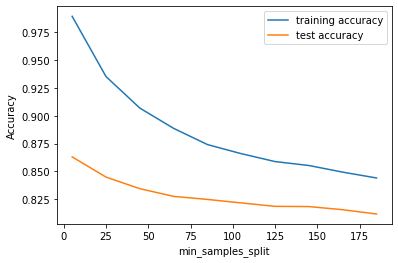

In [247]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Now we will be running the model with grid search to find the optimal hyper parameters

In [251]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(train_pca_8, y_train_sm)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   35.5s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

In [252]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.423929      0.019572         0.000710        0.000881   
1        0.406149      0.008614         0.002674        0.002375   
2        0.392185      0.007171         0.002039        0.003123   
3        0.423560      0.014455         0.001747        0.001013   
4        0.668947      0.014083         0.001844        0.002761   
5        0.697536      0.038575         0.001000        0.000896   
6        0.644717      0.024976         0.003228        0.003954   
7        0.650474      0.018400         0.001590        0.003181   
8        0.293458      0.023339         0.003020        0.002531   
9        0.256097      0.004772         0.000613        0.000823   
10       0.254818      0.004628         0.001230        0.001004   
11       0.250409      0.002703         0.001219        0.001959   
12       0.429662      0.011438         0.000000        0.000000   
13       0.452033      0.026906         0.003551        0.006153   
14       0.440558      0.041410         0.000955        0.001187   
15       0.400364      0.005705         0.001413        0.002825   

   param_criterion param_max_depth param_min_samples_leaf  \
0          entropy               5                     50   
1          entropy               5                     50   
2          entropy               5                    100   
3          entropy               5                    100   
4          entropy              10                     50   
5          entropy              10                     50   
6          entropy              10                    100   
7          entropy              10                    100   
8             gini               5                     50   
9             gini               5                     50   
10            gini               5                    100   
11            gini               5                    100   
12            gini              10                     50   
13            gini              10                     50   
14            gini              10                    100   
15            gini              10                    100   

   param_min_samples_split                                             params  \
0                       50  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
1                      100  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
2                       50  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
3                      100  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
4                       50  {'criterion': 'entropy', 'max_depth': 10, 'min...   
5                      100  {'criterion': 'entropy', 'max_depth': 10, 'min...   
6                       50  {'criterion': 'entropy', 'max_depth': 10, 'min...   
7                      100  {'criterion': 'entropy', 'max_depth': 10, 'min...   
8                       50  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
9                      100  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
10                      50  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
11                     100  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
12                      50  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   
13                     100  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   
14                      50  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   
15                     100  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   

    split0_test_score  split1_test_score  split2_test_score  \
0            0.763478           0.770447           0.779261   
1            0.763478           0.770447           0.779261   
2            0.762960           0.770447           0.779261   
3            0.762960           0.770447           0.779261   
4            0.806247           0.808166           0.820480   
5            0.806247           0.808166           0.

In [253]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8125779091648532
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [254]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(train_pca_8, y_train_sm)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [255]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(test_pca_8)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89      8272
           1       0.25      0.66      0.36       729

    accuracy                           0.81      9001
   macro avg       0.61      0.74      0.63      9001
weighted avg       0.91      0.81      0.85      9001



### Random Forest

In [256]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with 13 trees
rfc = RandomForestClassifier(n_estimators=13)
rfc.fit(train_pca_8, y_train_sm)

RandomForestClassifier(n_estimators=13)

In [261]:
# Making predictions
predictions = rfc.predict(test_pca_8)

# Importing classification report 
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93      8272
           1       0.31      0.51      0.38       729

    accuracy                           0.87      9001
   macro avg       0.63      0.71      0.65      9001
weighted avg       0.90      0.87      0.88      9001



#### Grid search to find optimal parameters for Random Forests

In [258]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,12,16,20],
    'min_samples_leaf': range(10, 20, 30),
    'min_samples_split': range(10, 30, 50),
    'n_estimators': [5,10,15,20], 
    'max_features': [5, 10, 15]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [259]:
# Fit the grid search to the data
grid_search.fit(train_pca_8, y_train_sm)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.8min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 12, 16, 20],
                         'max_features': [5, 10, 15],
                         'min_samples_leaf': range(10, 20, 30),
                         'min_samples_split': range(10, 30, 50),
                         'n_estimators': [5, 10, 15, 20]},
             verbose=1)

In [262]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8769182641195964 using {'max_depth': 16, 'max_features': 10, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 20}


#### Fitting the best model

In [263]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=16,
                             min_samples_leaf=10, 
                             min_samples_split=10,
                             max_features=10,
                             n_estimators=20)

In [264]:
# fit
rfc.fit(train_pca_8, y_train_sm)

RandomForestClassifier(max_depth=16, max_features=10, min_samples_leaf=10,
                       min_samples_split=10, n_estimators=20)

In [265]:
# predict
predictions = rfc.predict(test_pca_8)

In [266]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      8272
           1       0.32      0.64      0.42       729

    accuracy                           0.86      9001
   macro avg       0.64      0.76      0.67      9001
weighted avg       0.91      0.86      0.88      9001



### Conclusion

**We ran the following models and have summarized our findings in the table below -**
- Princple component Analysis 
- Logistic Regression 
- Decision Tree
- Random Forest

*We see that almost on all models the values are coming very similar to each other and more often than not there is a trade off between precision and recall*

*Since both the metrics are important, we feel that going ahead with Random forests*

**We notice that the following 3 factors inversely correlated to churn rate considerably -**
- total outgoing minutes per usage in August
- total incoming calls minutes per usage in August
- Last recharge Amount in August


**2 factors directly correlated to churn**
- Std outgoing call mintues per usage
- local calls outgoing operator to operator call mintues per usage